# EDA the Amazon E-Commerce dataset

### I. General Sales Trend Analysis

#### 1.1 Period from June 2021 to May 2022 (International Sales B2B)

##### Distribution of Order Quantity and Revenue

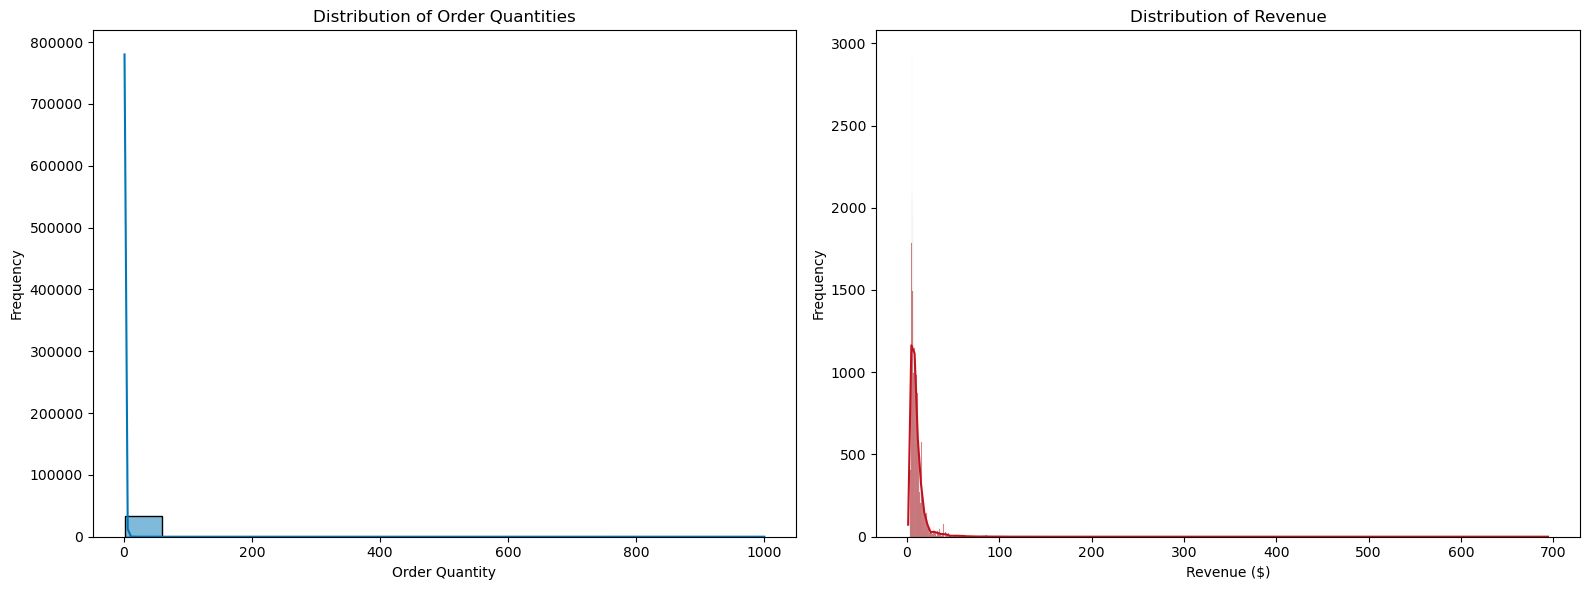

Order Quantity Statistics:
count    33526.000000
mean         1.314472
std          7.464712
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1000.000000
Name: quantity, dtype: float64

Revenue Statistics:
count    33526.000000
mean        10.663451
std         12.450681
min          1.210000
25%          5.590000
50%          7.860000
75%         11.720000
max        694.470000
Name: gross_amount($), dtype: float64


In [ ]:
plt.figure(figsize=(16, 6))

# Plot 1: Distribution of order quantities
plt.subplot(1, 2, 1)
sns.histplot(combined_international_sales['quantity'], kde=True, color='#0077b6')
plt.title('Distribution of Order Quantities', fontsize=12)
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')

# Plot 2: Distribution of revenue
plt.subplot(1, 2, 2)
sns.histplot(combined_international_sales['gross_amount($)'], kde=True, color='#c1121f')
plt.title('Distribution of Revenue', fontsize=12)
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics
print("Order Quantity Statistics:")
print(combined_international_sales['quantity'].describe())
print("\nRevenue Statistics:")
print(combined_international_sales['gross_amount($)'].describe())

##### Sales Trend Overtime

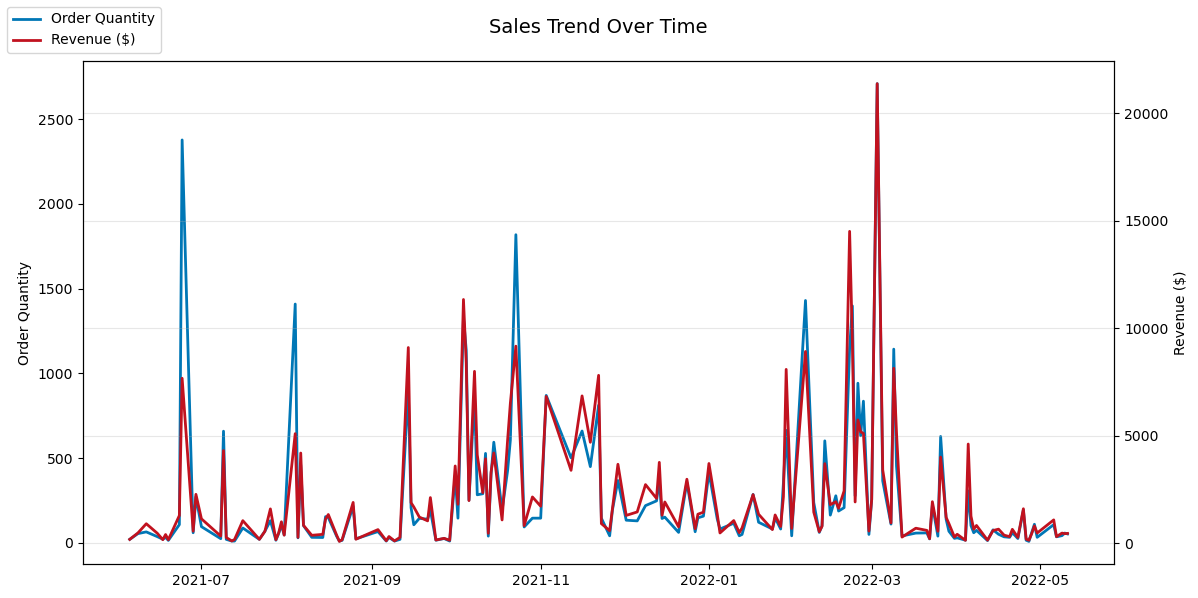

In [ ]:
# Group by date to get daily sales metrics
daily_sales_2021 = combined_international_sales.groupby('date').agg({
    'quantity': 'sum',
    'gross_amount($)': 'sum'
}).reset_index()

# Visualise the sales trend over time
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_sales_2021['date'], daily_sales_2021['quantity'], 
         label='Order Quantity', color='#0077b6', linewidth=2)
ax1.set_ylabel('Order Quantity')

ax2 = ax1.twinx()
ax2.plot(daily_sales_2021['date'], daily_sales_2021['gross_amount($)'], 
         label='Revenue ($)', color='#c1121f', linewidth=2)
ax2.set_ylabel('Revenue ($)')

plt.title('Sales Trend Over Time', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)


plt.tight_layout()
plt.show()


##### Monthly Sales Performance

In [ ]:
# Group data by 'month' and calculate total sales volume and revenue
monthly_sales_2021 = combined_international_sales.groupby(['month', 'year']).agg({
    'quantity': 'sum',  # Total sales volume
    'gross_amount($)': 'sum'  # Total revenue
}).reset_index()

# Sort by month for chronological order
monthly_sales_2021['month'] = pd.Categorical(monthly_sales_2021['month'], categories=month_order, ordered=True)
monthly_sales_2021 = monthly_sales_2021.sort_values(['year', 'month'])
monthly_sales_2021 = monthly_sales_2021[
    (monthly_sales_2021['quantity'] > 0) | (monthly_sales_2021['gross_amount($)'] > 0)
]

In [ ]:
# Find the month with the highest sales volume
peak_volume_month_2021 = monthly_sales_2021.loc[monthly_sales_2021['quantity'].idxmax()]
print(f"Peak Sales Volume Month: {peak_volume_month_2021['month']} with {peak_volume_month_2021['quantity']} units sold")

# Find the month with the lowest sales volume
low_volume_month_2021 = monthly_sales_2021.loc[monthly_sales_2021['quantity'].idxmin()]
print(f"Low Sales Volume Month: {low_volume_month_2021['month']} with {low_volume_month_2021['quantity']} units sold")

# Find the month with the highest revenue
peak_revenue_month_2021 = monthly_sales_2021.loc[monthly_sales_2021['gross_amount($)'].idxmax()]
print(f"Peak Revenue Month: {peak_revenue_month_2021['month']} with ${peak_revenue_month_2021['gross_amount($)']:.2f}")

# Find the month with the lowest revenue
low_revenue_month_2021 = monthly_sales_2021.loc[monthly_sales_2021['gross_amount($)'].idxmin()]
print(f"Low Revenue Month: {low_revenue_month_2021['month']} with ${low_revenue_month_2021['gross_amount($)']:.2f}")


Peak Sales Volume Month: October with 9554.0 units sold
Low Sales Volume Month: May with 298.0 units sold
Peak Revenue Month: October with $77787.94
Low Revenue Month: May with $2715.88


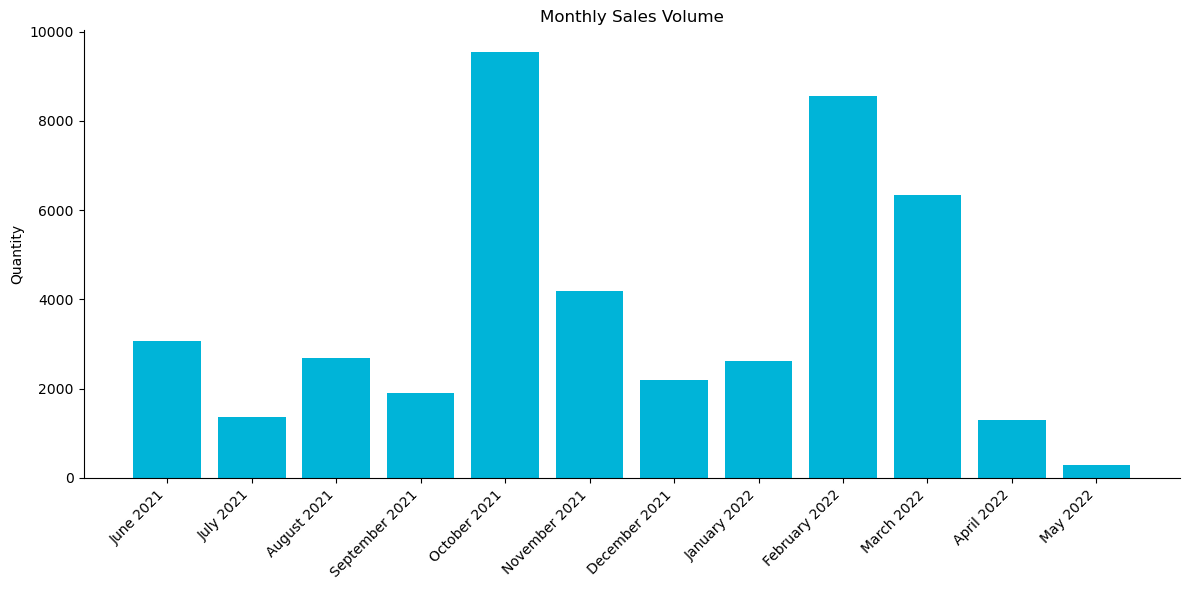

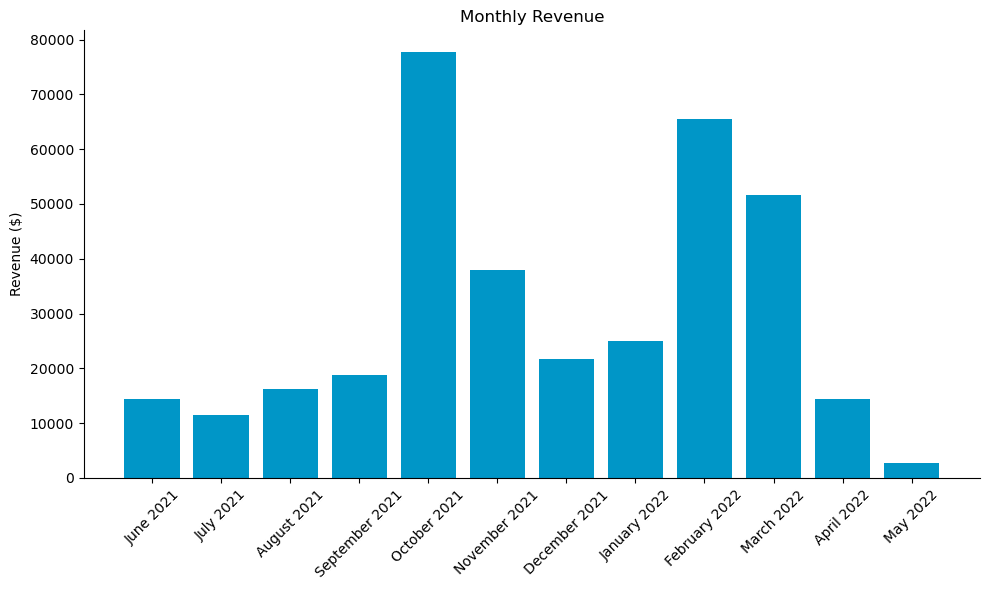

In [ ]:
# Create a new column combining 'month' and 'year' for x-axis labels
monthly_sales_2021['month_year'] = monthly_sales_2021['month'].astype(str) + " " + monthly_sales_2021['year'].astype(str)

# Plot sales volume by month and year
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales_2021['month_year'], monthly_sales_2021['quantity'], color='#00b4d8')
plt.title('Monthly Sales Volume')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# Plot revenue by month
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_2021['month_year'], monthly_sales_2021['gross_amount($)'], color='#0096c7')
plt.title('Monthly Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


**Major Revenue Peaks**:
- October 2021: Highest revenue ($77,787.94) coinciding with maximum sales volume (9,554 units), indicating a significant sales event or bulk order.

- ,February 2022: Second-highest revenue ($65,458.64) with 8,556 units sold, showing strong winter season performance.

- March 2022: Substantial revenue ($51,579.90) with 6,346 units, suggesting continued spring season strength.

- June 2021: Notable spike (over 2,500 units, $20,000+), potentially reflecting summer collection launch or promotional event.

**Premium Product Periods**: Several months (particularly March 2022 and September 2021) showed revenue outpacing order quantity, indicating higher average unit prices or premium product sales during these periods.

**Seasonal Pattern Identification**:
- High-Demand Seasons: October-November 2021 (autumn/winter) and February-March 2022 (late winter/early spring) align with typical seasonal fashion cycles when consumers purchase new seasonal wardrobes.
- Low-Demand Periods: July-August 2021 and April-May 2022 show reduced activity, corresponding to transitional periods between major fashion seasons.

**Concerning Decline**: Steep downward trend in both metrics during April-May 2022, with May recording the lowest sales (298 units, $2,715.88), potentially indicating market saturation, inventory issues, or changing consumer preferences.

**Volume Fluctuations**: Significant variability in monthly sales volumes throughout the year, with October 2021 (9,554 units) representing the peak and May 2022 (298 units) representing a concerning 97% decline from peak volume.


#### 1.2 Period from April 2022 to June 2022 (Sales in India)

##### Distribution of Order Quantity and Revenue

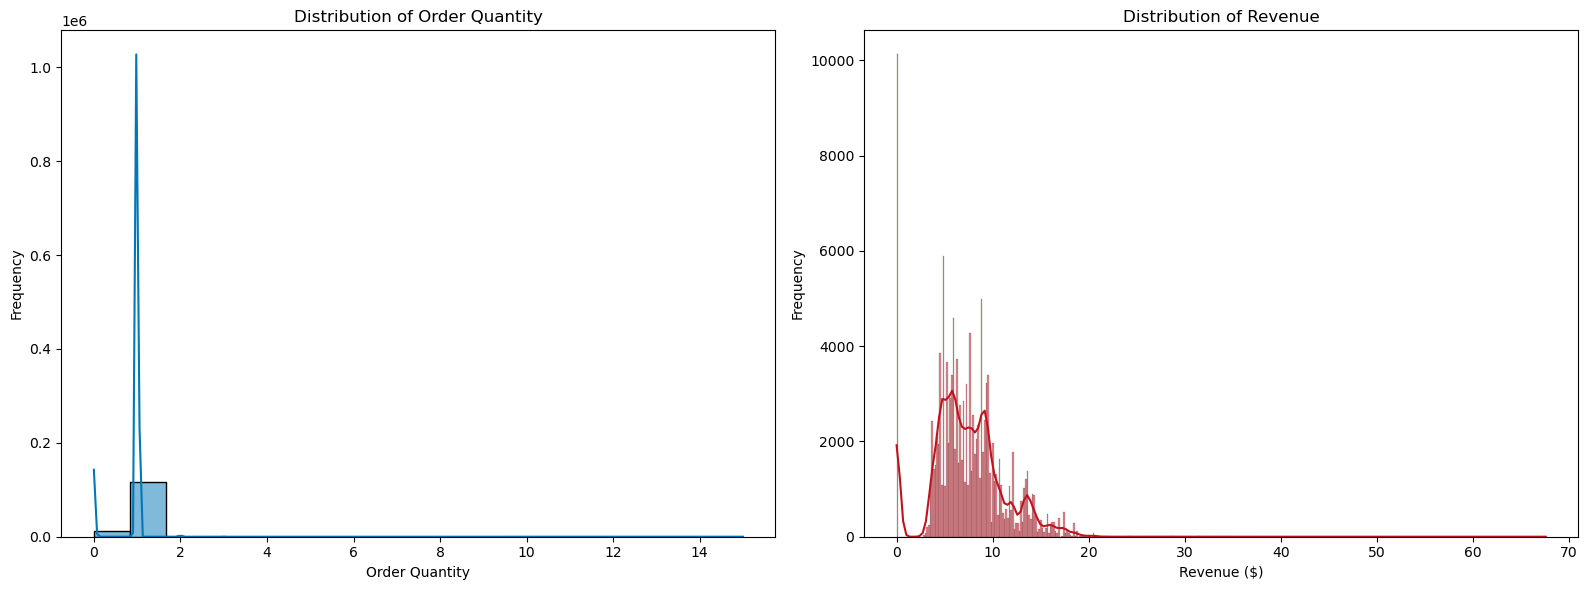

Order Quantity Statistics:
count    128797.000000
mean          0.904439
std           0.313370
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          15.000000
Name: order_quantity, dtype: float64

Revenue Statistics:
count    128797.000000
mean          7.372692
std           3.791517
min           0.000000
25%           5.000000
50%           7.050000
75%           9.330000
max          67.560000
Name: order_amount_($), dtype: float64


In [ ]:
plt.figure(figsize=(16, 6))

# Plot 1: Distribution of order quantities
plt.subplot(1, 2, 1)
sns.histplot(amazon_sales['order_quantity'], kde=True, color='#0077b6')
plt.title('Distribution of Order Quantity', fontsize=12)
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')

# Plot 2: Distribution of revenue
plt.subplot(1, 2, 2)
sns.histplot(amazon_sales['order_amount_($)'], kde=True, color='#c1121f')
plt.title('Distribution of Revenue', fontsize=12)
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics
print("Order Quantity Statistics:")
print(amazon_sales['order_quantity'].describe())
print("\nRevenue Statistics:")
print(amazon_sales['order_amount_($)'].describe())

Number of outliers: 13177
Percentage of outliers: 10.23%

Summary of outliers:
count    13177.000000
mean         0.065948
std          0.420311
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: order_quantity, dtype: float64


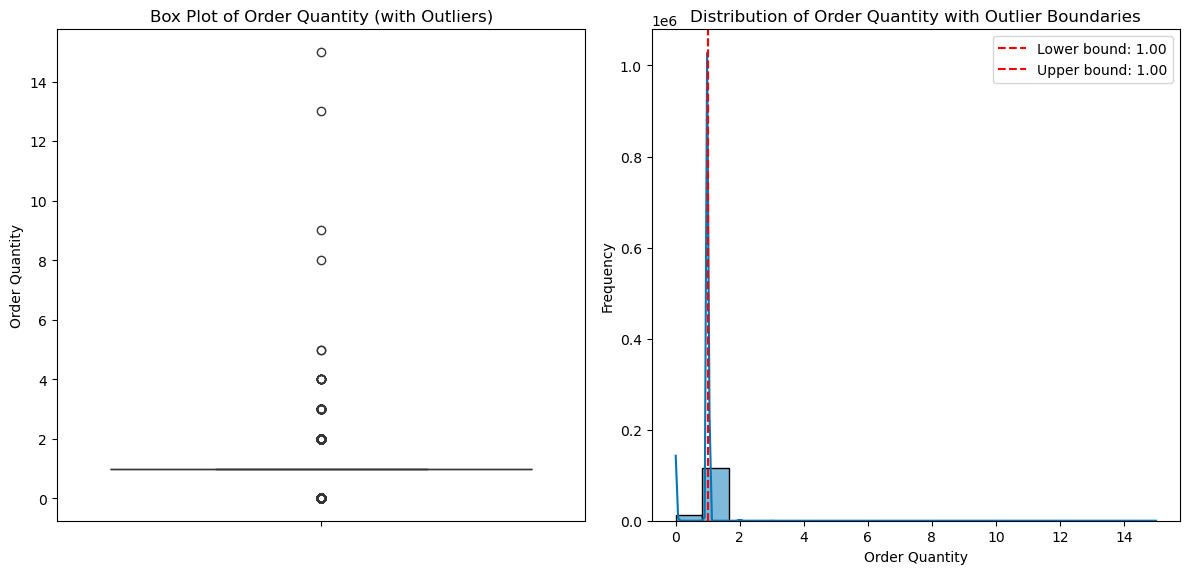

In [ ]:
# Identify outliers using IQR for order quantity
Q1 = amazon_sales['order_quantity'].quantile(0.25)
Q3 = amazon_sales['order_quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = amazon_sales[(amazon_sales['order_quantity'] < lower_bound) | 
                        (amazon_sales['order_quantity'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(amazon_sales)) * 100:.2f}%")
print("\nSummary of outliers:")
print(outliers['order_quantity'].describe())

# Visualize the outliers
plt.figure(figsize=(12, 6))

# Box plot to show outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=amazon_sales['order_quantity'], color='#0077b6')
plt.title('Box Plot of Order Quantity (with Outliers)', fontsize=12)
plt.ylabel('Order Quantity')

# Histogram with bounds marked
plt.subplot(1, 2, 2)
sns.histplot(amazon_sales['order_quantity'], kde=True, color='#0077b6')
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
plt.title('Distribution of Order Quantity with Outlier Boundaries', fontsize=12)
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

**Observations**:

- Most orders have a quantity of 1, with very few exceeding this value. Outliers exist, as seen in the dataset sample, with some orders having unusually high quantities.

- The revenue distribution is skewed, with most transactions generating between $5 and $10.



Outliers (13,177 rows) include cancelled orders and unusually high quantities (e.g., bulk purchases). These rows provide insights into operational inefficiencies or unique customer behaviors.

**Recommendation**:

- Separate outliers into a distinct category in for analysis of cancellations and bulk purchases.

- Use filters to exclude cancellations from general sales performance metrics but retain them for operational analysis.

##### Sales Trend Over Time

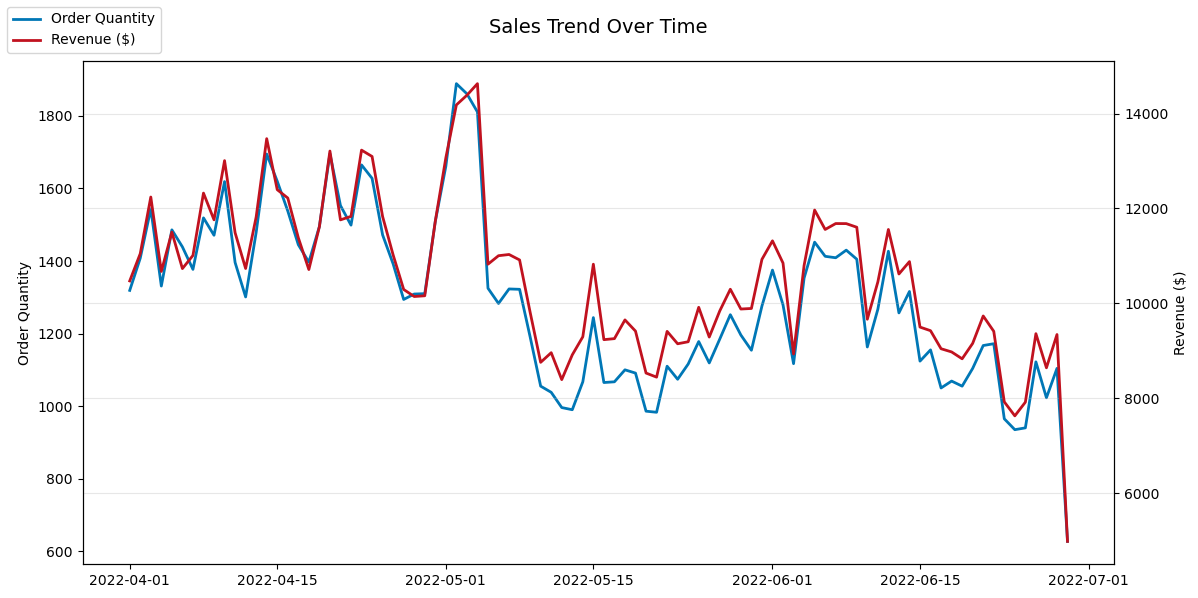

In [ ]:
# Group by date to get daily sales metrics
daily_sales_2022 = amazon_sales.groupby('date').agg({
    'order_quantity': 'sum',
    'order_amount_($)': 'sum'
}).reset_index()

# Visualise the sales trend over time
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_sales_2022['date'], daily_sales_2022['order_quantity'], 
         label='Order Quantity', color='#0077b6', linewidth=2)
ax1.set_ylabel('Order Quantity')

ax2 = ax1.twinx()
ax2.plot(daily_sales_2022['date'], daily_sales_2022['order_amount_($)'], 
         label='Revenue ($)', color='#c1121f', linewidth=2)
ax2.set_ylabel('Revenue ($)')

plt.title('Sales Trend Over Time', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

##### Monthly Sales Performance

In [ ]:
# Group data by 'month' and calculate total sales volume and revenue
monthly_sales_2022 = amazon_sales.groupby('month').agg({
    'order_quantity': 'sum',  # Total sales volume
    'order_amount_($)': 'sum'  # Total revenue
}).reset_index()

# Calculate the percentage change in revenue between the months
revenue_by_month_2022 = amazon_sales.groupby('month')['order_amount_($)'].sum()
percent_decrease_apr_to_may = (revenue_by_month_2022['April'] - revenue_by_month_2022['May']) / revenue_by_month_2022['April'] * 100
percent_decrease_may_to_jun = (revenue_by_month_2022['May'] - revenue_by_month_2022['June']) / revenue_by_month_2022['May'] * 100
total_decrease = (revenue_by_month_2022['April'] - revenue_by_month_2022['June']) / revenue_by_month_2022['April'] * 100

# Sort by month for chronological order
monthly_sales_2022['month'] = pd.Categorical(monthly_sales_2022['month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales_2022.sort_values('month')

# Display the monthly sales data
print("The monnthly sale performance from April to June 2022:")
print(monthly_sales_2022)
print(f"The revenue in May experienced a -{percent_decrease_apr_to_may:.2f}% decrease from April.")
print(f"The revenue in June experienced a -{percent_decrease_may_to_jun:.2f}% decrease from May.")
print(f"Total revenue for Q2 2022 decreased by -{total_decrease:.2f}%")

The monnthly sale performance from April to June 2022:
   month  order_quantity  order_amount_($)
0  April           44206         348904.45
1   June           34275         283391.49
2    May           38008         317284.62
The revenue in May experienced a -9.06% decrease from April.
The revenue in June experienced a -10.68% decrease from May.
Total revenue for Q2 2022 decreased by -18.78%


In [ ]:
# Find the month with the highest sales volume
peak_volume_month_2022 = monthly_sales_2022.loc[monthly_sales_2022['order_quantity'].idxmax()]
print(f"Peak Sales Volume Month: {peak_volume_month_2022['month']} with {peak_volume_month_2022['order_quantity']} units sold")

# Find the month with the lowest sales volume
low_volume_month_2022 = monthly_sales_2022.loc[monthly_sales_2022['order_quantity'].idxmin()]
print(f"Low Sales Volume Month: {low_volume_month_2022['month']} with {low_volume_month_2022['order_quantity']} units sold")

# Find the month with the highest revenue
peak_revenue_month_2022 = monthly_sales_2022.loc[monthly_sales_2022['order_amount_($)'].idxmax()]
print(f"Peak Revenue Month: {peak_revenue_month_2022['month']} with ${peak_revenue_month_2022['order_amount_($)']:.2f}")

# Find the month with the lowest revenue
low_revenue_month_2022 = monthly_sales_2022.loc[monthly_sales_2022['order_amount_($)'].idxmin()]
print(f"Low Revenue Month: {low_revenue_month_2022['month']} with ${low_revenue_month_2022['order_amount_($)']:.2f}")

Peak Sales Volume Month: April with 44206 units sold
Low Sales Volume Month: June with 34275 units sold
Peak Revenue Month: April with $348904.45
Low Revenue Month: June with $283391.49


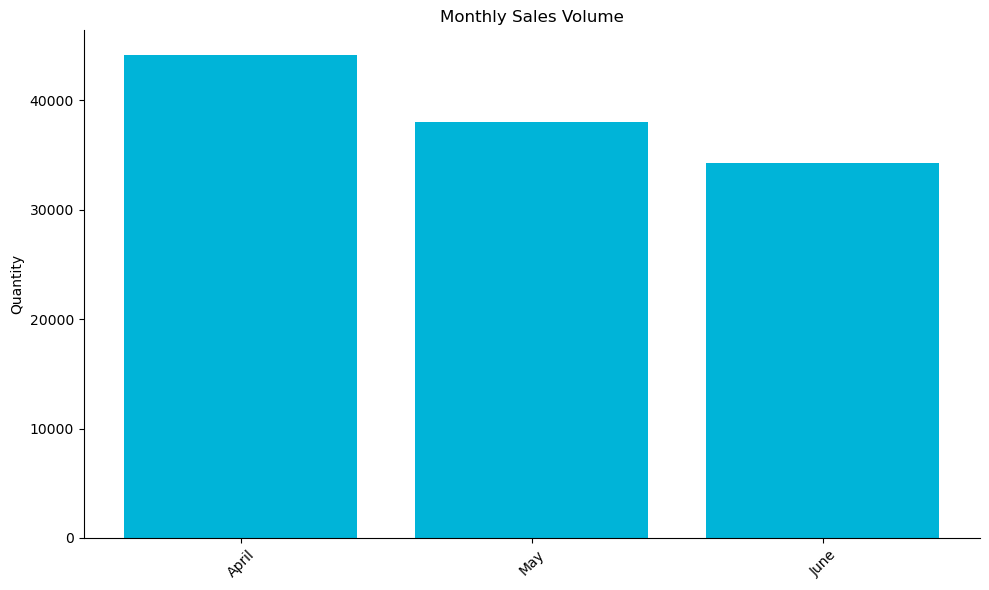

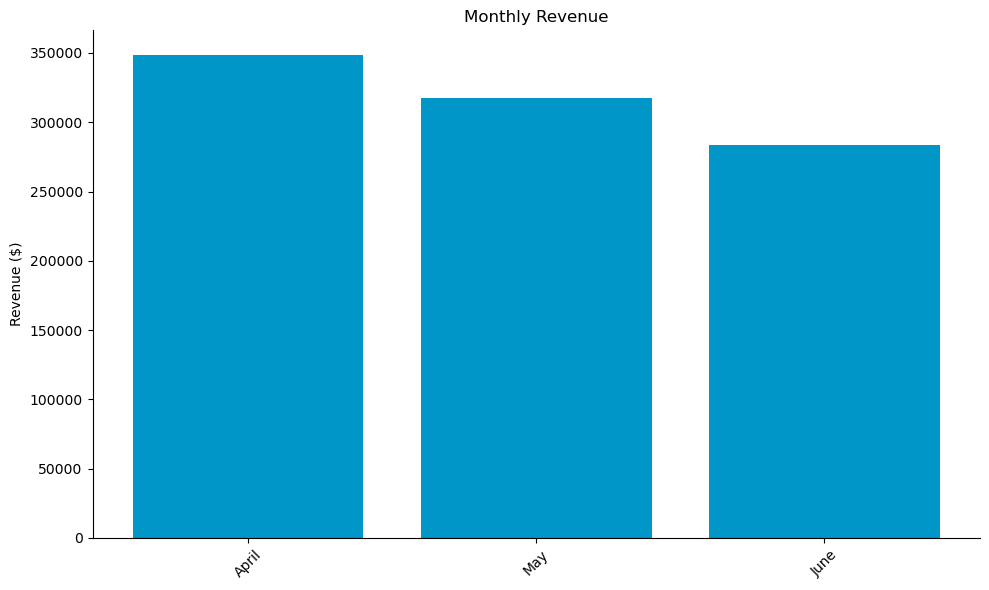

In [ ]:
# Plot sales volume by month
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['month'], monthly_sales['order_quantity'], color='#00b4d8')
plt.title('Monthly Sales Volume')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# Plot revenue by month
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['month'], monthly_sales['order_amount_($)'], color='#0096c7')
plt.title('Monthly Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

**Overall Sales Performance**:
- April 2022: Recorded the highest sales performance with 44,206 units sold and total revenue of $348,904.45.

- May 2022: Sales volume decreased slightly to 38,008 units, resulting in a revenue decline of -9.06% to $317,284.62.

- June 2022: Sales volume dropped further to 34,275 units, with revenue decreasing by an additional -10.68% to $283,391.49.

**Declining Revenue Trend**:
- Revenue declined consistently over the three months, with a cumulative decrease of approximately -18.8% from April to June.

- This decline in revenue aligns with the reduction in sales volume, indicating a direct correlation between order quantity and revenue.

**Month-by-Month Comparison**: 
- April 2022: Highest order quantity and revenue suggest strong demand during this period, possibly due to seasonal demand or promotional activities driving higher sales.

- May 2022: Moderate decline in both order quantity (-13.99%) and revenue (-9.06%), indicating reduced demand compared to April. The smaller percentage drop in revenue compared to order quantity suggests slightly higher average unit prices or premium product sales.

- June 2022: Significant decline in order quantity (-9.83%) and revenue (-10.68%) compared to May, reflecting a continued downward trend. The consistent drop may indicate market saturation, seasonal demand shifts, or external factors affecting purchasing behavior.

#### 1.3 Category Sales Performance

In [ ]:
# Group data by 'product_category' and calculate total sales volume and revenue
category_sales_cust = amazon_sales.groupby('product_category').agg({
    'order_quantity': 'sum',  # Total sales volume
    'order_amount_($)': 'sum'  # Total revenue
}).reset_index()

# Sort categories by sales volume in descending order
category_sales_cust = category_sales_cust.sort_values('order_quantity', ascending=False)

# Display the category-wise sales data
print("Category-Wise Sales Data:")
print(category_sales_cust)

Category-Wise Sales Data:
  product_category  order_quantity  order_amount_($)
6              Set           45219         473634.23
4            Kurta           44972         257266.80
8    Western Dress           13937         135605.96
7              Top            9894          64638.34
3     Ethnic Dress            1052           9559.10
0           Blouse             862           5542.42
1           Bottom             398           1823.10
5            Saree             152           1499.54
2          Dupatta               3             11.07


In [ ]:
# Identify top-selling categories (top 5)
top_categories = category_sales_cust.head(5)
print("\nTop-Selling Categories:")
print(top_categories)


Top-Selling Categories:
  product_category  order_quantity  order_amount_($)
6              Set           45219         473634.23
4            Kurta           44972         257266.80
8    Western Dress           13937         135605.96
7              Top            9894          64638.34
3     Ethnic Dress            1052           9559.10


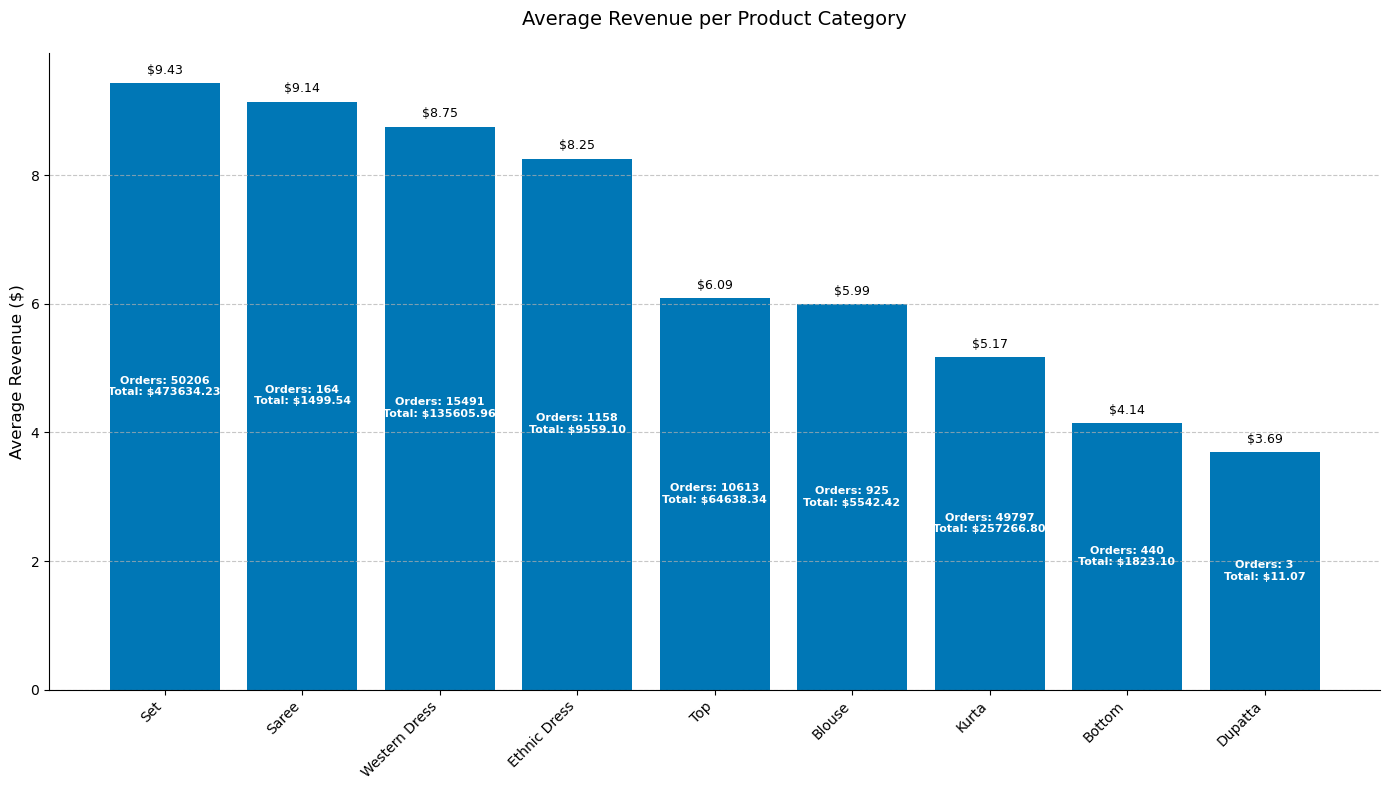

In [ ]:
# Calculate average revenue per category 
category_avg_revenue = amazon_sales.groupby('product_category').agg({
    'order_amount_($)': ['mean', 'sum', 'count']
}).reset_index()

# Flatten the multi-index columns
category_avg_revenue.columns = ['product_category', 'avg_revenue', 'total_revenue', 'order_count']

# Sort by average revenue in descending order
category_avg_revenue = category_avg_revenue.sort_values('avg_revenue', ascending=False)

# Take top 15 categories for better visualization
top_categories = category_avg_revenue.head(15)

# Create the bar plot
plt.figure(figsize=(14, 8))
bars = plt.bar(top_categories['product_category'], top_categories['avg_revenue'], color='#0077b6')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'${height:.2f}', ha='center', va='bottom', rotation=0, fontsize=9)

# Customize the plot
plt.title('Average Revenue per Product Category', fontsize=14, pad=20)
plt.ylabel('Average Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Add annotation about order count
for i, (category, avg_rev, total_rev, count) in enumerate(zip(
    top_categories['product_category'], top_categories['avg_revenue'], 
    top_categories['total_revenue'], top_categories['order_count'])):
    plt.text(i, avg_rev/2, f'Orders: {count}\nTotal: ${total_rev:.2f}', 
             ha='center', va='center', fontsize=8, color='white', fontweight='bold')

plt.show()

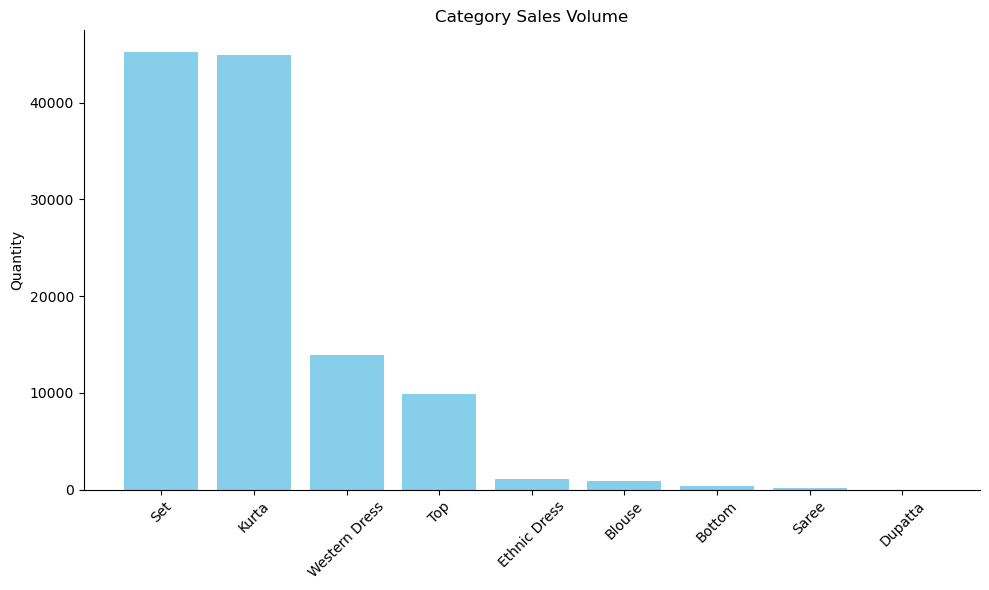

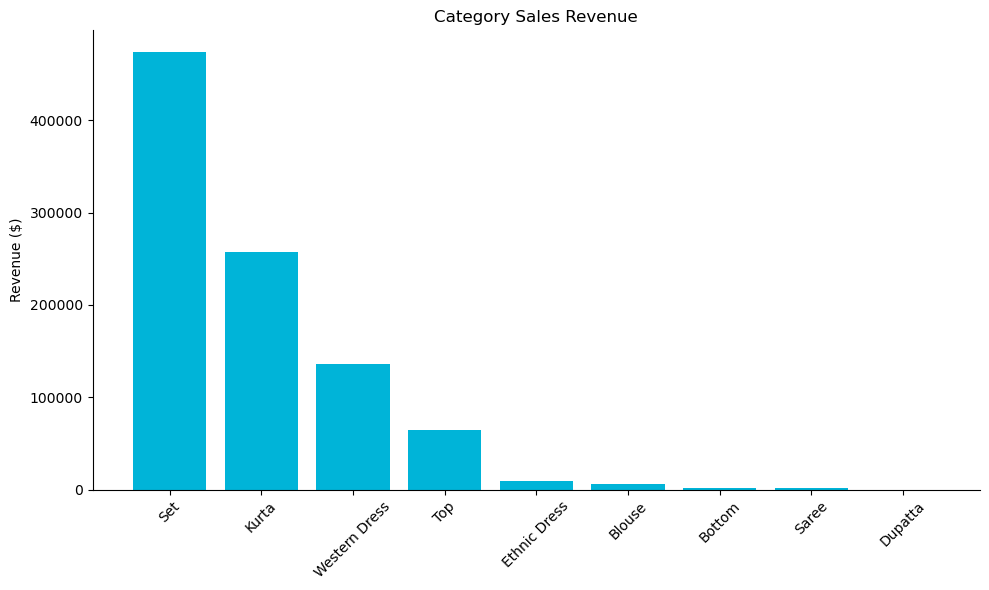

In [ ]:
# Visualize sales volume by category
plt.figure(figsize=(10, 6))
plt.bar(category_sales_cust['product_category'], category_sales_cust['order_quantity'], color='skyblue')
plt.title('Category Sales Volume')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# Visualize revenue by category
plt.figure(figsize=(10, 6))
plt.bar(category_sales_cust['product_category'], category_sales_cust['order_amount_($)'], color='#00b4d8')
plt.title('Category Sales Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

**Top-Performing Categories**:
- Set: The highest-performing category with 45,219 units sold, generating $473,634.23 in revenue. This category alone contributes significantly to overall sales performance, indicating strong customer demand for bundled items or coordinated sets.

- Kurta: Second-highest sales volume (44,972 units) and revenue ($257,266.80). Despite comparable order quantities to "Set," the revenue is significantly lower, suggesting lower average unit prices.

- Western Dress: Moderate performance with 13,937 units sold, contributing $135,605.96 in revenue. This category has a higher average unit price compared to Kurta, indicating potential demand for premium products.

**Low-Performing Categories**:
- Blouse: Sold only 862 units, contributing a modest revenue of $5,542.42.

- Bottom: The lowest-performing category among major items with just 398 units sold, generating only $1,823.10 in revenue.

- Saree and Dupatta: Extremely low sales volumes (152 units for Saree; 3 units for Dupatta) and minimal revenue contributions ($1,499.54 for Saree; $11.07 for Dupatta).


#### 1.4 Sales Performance by Size

In [ ]:
# Group sales data by size to calculate total sales volume and revenue
sales_by_size = amazon_sales.groupby('size').agg({
    'order_quantity': 'sum',  # Total sales volume
    'order_amount_($)': 'sum'  # Total revenue
}).reset_index()
sales_by_size = sales_by_size.sort_values(by='order_quantity', ascending=False)

# Display the grouped data
print("Sales by Size:")
print(sales_by_size)

Sales by Size:
  size  order_quantity  order_amount_($)
5    M           20418         167994.20
4    L           19970         159861.03
7   XL           18896         150587.26
9  XXL           16490         128522.85
6    S           15313         128437.01
0  3XL           13508         110692.54
8   XS            9932          84867.40
3  6XL             686           6957.71
2  5XL             512           5131.86
1  4XL             398           4046.12


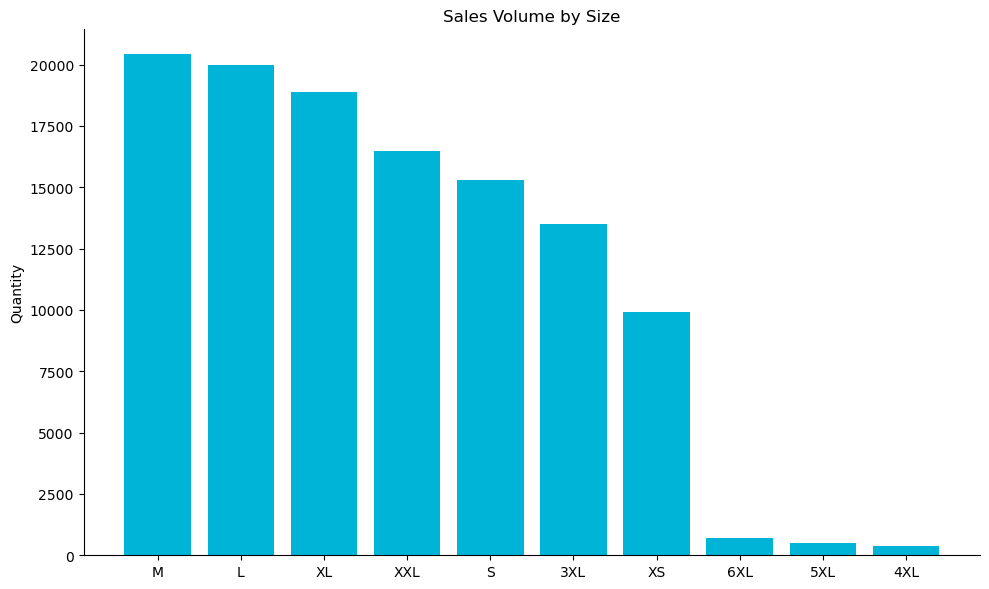

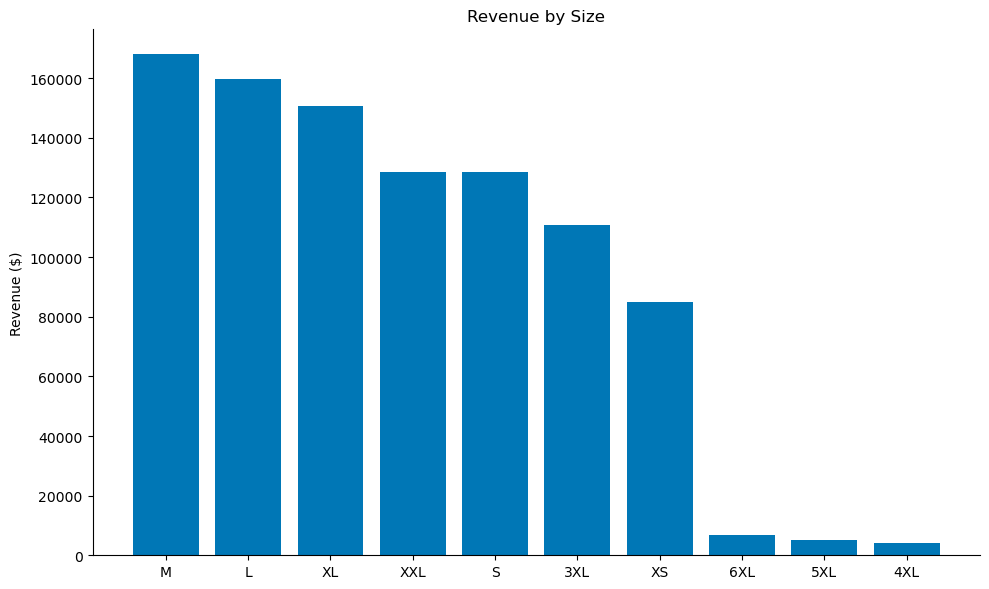

In [ ]:
# Visualize sales volume by size
plt.figure(figsize=(10, 6))
plt.bar(sales_by_size['size'], sales_by_size['order_quantity'], color='#00b4d8')
plt.title('Sales Volume by Size')
plt.ylabel('Quantity')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# Visualize revenue by size
plt.figure(figsize=(10, 6))
plt.bar(sales_by_size['size'], sales_by_size['order_amount_($)'], color='#0077b6')
plt.title('Revenue by Size')
plt.ylabel('Revenue ($)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


**Top-Performing Sizes**:
- Medium (M): The highest-performing size in terms of both order quantity (20,418 units) and revenue ($167,994.20). This size contributes significantly to overall sales, indicating strong customer preference for medium-sized clothing.

- Large (L): Second-highest revenue contributor ($159,861.03) with 19,970 units sold, closely following Medium in performance.

- Extra Large (XL): Generated $150,058.26 in revenue from 18,896 units sold, making it another top-performing size.

**Mid-Tier Sizes**:
- Small (S): Sold 15,313 units, generating $128,437.01 in revenue. While performing moderately well, it lags behind larger sizes in both volume and revenue.

- Extra Extra Large (XXL): Contributed $128,522.85 in revenue from 16,490 units sold, indicating steady demand for larger sizes.

- Extra Small (XS): Sold 9,932 units, generating a lower revenue of $84,867.40, reflecting limited demand for smaller sizes.

**Low-Performing Sizes**:
- 3XL: Despite selling a respectable quantity (13,508 units), it contributed only $106,692.54 in revenue, suggesting lower average unit prices or discounts for this size.

- 4XL to 6XL: These sizes show minimal sales volumes and revenue contributions: 4XL: Only 398 units sold, generating just $4,046.12. 5XL: Sold 512 units, contributing a modest $5,131.86. 6XL: Sold slightly more (686 units) but generated only $6,957.71.

**Revenue vs. Quantity Correlation**: There is a strong correlation between order quantity and revenue for most sizes (e.g., M, L, XL). However sizes like 3XL show lower revenue relative to their sales volume, indicating potential pricing issues or discounts. Smaller and larger niche sizes (XS, 4XL–6XL) contribute minimally to overall sales.


#### 1.5 Stock Level effect on Sales Performance

The amazon_sales and sale_report dataframes are used for this analysis

In [ ]:
# Merge the amazon_sales and sale_report dataframes on the 'sku' column
merged_sales_tables = pd.merge(sale_report, amazon_sales, left_on='sku', right_on='sku', how='inner')

# Display the first few rows of the merged data to verify
merged_sales_tables.head()

,sku,design,stock,category,size_x,color,order_ID,date,ship_status,fullfilment,...,asin,courier_ship_status,order_quantity,order_amount_($),city,state,zip,promotion,customer_type,month
0,AN201-RED-M,AN201,5.0,Leggings,M,Red,403-7294691-2015536,2022-04-07,Shipped,Amazon,...,B091GP22TP,Shipped,1,2.77,Parchur,Andhra Pradesh,523171.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Customer,April
1,AN201-RED-M,AN201,5.0,Leggings,M,Red,404-8297237-4618714,2022-05-01,Shipped - Delivered To Buyer,Merchant,...,B091GP22TP,Shipped,1,2.77,Asansol,West Bengal,713304.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer,May
2,AN201-RED-XL,AN201,6.0,Leggings,XL,Red,402-2756527-8577915,2022-06-26,Shipped,Amazon,...,B091GLZF98,Shipped,1,3.64,Hyderabad,Telangana,500089.0,No Promotion,Customer,June
3,AN201-RED-XL,AN201,6.0,Leggings,XL,Red,404-9268921-7038734,2022-06-24,Shipped,Amazon,...,B091GLZF98,Shipped,1,3.64,Hyderabad,Telangana,500013.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Customer,June
4,AN201-RED-XXL,AN201,3.0,Leggings,XXL,Red,406-9345295-6918758,2022-05-03,Shipped - Delivered To Buyer,Merchant,...,B091GP61BH,Shipped,1,2.77,Salbani,West Bengal,721132.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer,May


In [ ]:
# Group by 'sku' and calculate total sales volume and stock level
stock_sales_analysis = merged_sales_tables.groupby('sku').agg({
    'order_quantity': 'sum',  # Total sales volume
    'stock': 'mean'           # Average stock level
}).reset_index()

# Display the analysis
print(stock_sales_analysis)

                   sku  order_quantity  stock
0          AN201-RED-M               2    5.0
1         AN201-RED-XL               2    6.0
2        AN201-RED-XXL               1    3.0
3       AN202-ORANGE-M               2    3.0
4       AN202-ORANGE-S               4   16.0
...                ...             ...    ...
6611    SET449-KR-NP-S               1   35.0
6612   SET461-KR-NP-XL               1   74.0
6613   SET461-KR-NP-XS               1   57.0
6614  SET461-KR-NP-XXL               1   74.0
6615    SET462-KR-NP-S               1   44.0

[6616 rows x 3 columns]


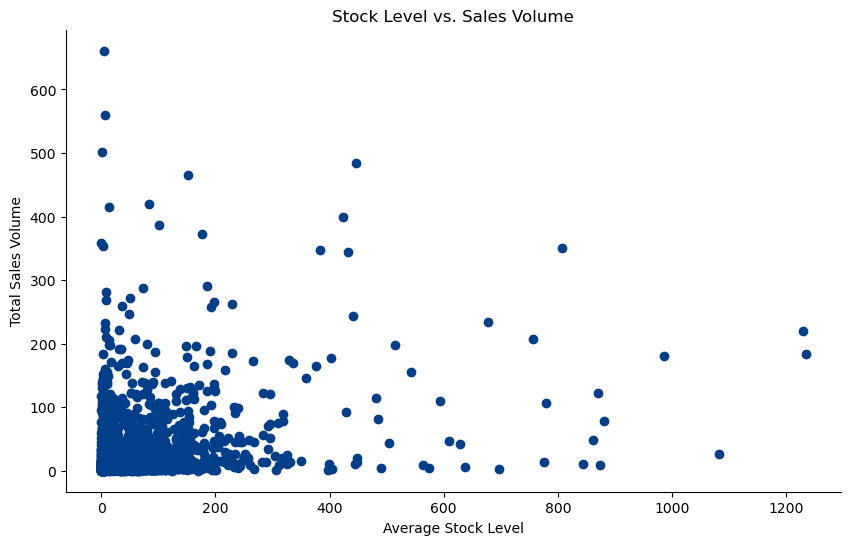

In [ ]:
# Visualize the relationship between stock level and sales volume
plt.figure(figsize=(10, 6))
plt.scatter(stock_sales_analysis['stock'], stock_sales_analysis['order_quantity'], color = '#023e8a')
plt.title('Stock Level vs. Sales Volume')
plt.xlabel('Average Stock Level')
plt.ylabel('Total Sales Volume')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#### 1.6 Order Status Distribution

In [ ]:
# Calculate the total number of cancelled and returned orders
cancelled_orders = amazon_sales[amazon_sales['ship_status'].isin(['Cancelled', 'Shipped - Lost In Transit'])]
returned_orders = amazon_sales[amazon_sales['ship_status'].isin(['Shipped - Returned To Seller', 'Shipped - Returning To Seller', 'Shipped - Rejected By Buyer', 'Shipped - Damaged'])]
total_cancelled = len(cancelled_orders)
total_returned = len(returned_orders)
total_cancelled_returned = total_cancelled + total_returned

# Calculate the percentage of cancelled and returned orders
percent_cancelled = total_cancelled / len(amazon_sales) * 100
percent_returned = total_returned / len(amazon_sales) * 100
percent_cancelled_returned = total_cancelled_returned / amazon_sales['order_quantity'].sum() * 100
percent_successful = 100 - percent_cancelled - percent_returned
print(f"Total cancelled orders: {total_cancelled}, which is {percent_cancelled:.2f}% of all orders.")
print(f"Total returned orders: {total_returned}, which is {percent_returned:.2f}% of all orders.")
print(f"This represents {percent_cancelled_returned:.2f}% of all orders.")

Total cancelled orders: 18316, which is 14.22% of all orders.
Total returned orders: 2109, which is 1.64% of all orders.
This represents 17.53% of all orders.


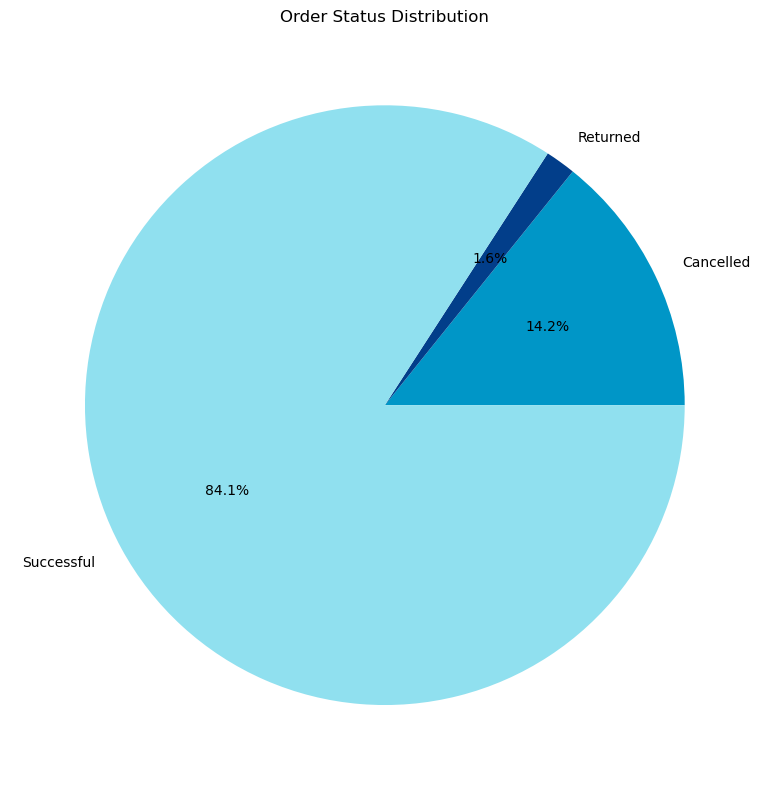

In [ ]:
# Visualise the cancelled and returned orders with a pie chart
plt.figure(figsize=(8, 8))
plt.pie([percent_cancelled, percent_returned, percent_successful], 
        labels=['Cancelled', 'Returned', 'Successful'], 
        colors=['#0096c7', '#023e8a', '#90e0ef'], 
        autopct='%1.1f%%')
plt.title('Order Status Distribution')
plt.tight_layout()
plt.show()


- **Successful Orders**: The majority of orders (84.14%) were successfully completed, indicating strong operational efficiency and customer satisfaction for most transactions. This high success rate reflects well on the company’s ability to fulfill orders effectively.

- **Cancelled Orders**: A total of 18,316 orders were cancelled, accounting for 14.22% of all orders. This relatively high cancellation rate suggests potential issues such as: Customers changing their minds, Stock unavailability or delays in delivery, Inefficient order processing or payment issues.

- **Returned Orders**: A total of 2,109 orders were returned, representing 1.64% of all orders. While the return rate is relatively low compared to cancellations, it still highlights areas for improvement such as: Product quality or sizing issues, Mismatched customer expectations due to inaccurate product descriptions or images.

- **Combined Impact of Cancelled and Returned Orders**: Together, cancelled and returned orders account for 17.53% of all transactions. This indicates that nearly one in every six orders does not result in a successful sale, which could impact revenue and customer retention.


### II. Customer Analysis 

#### 2.1 Customers demographic

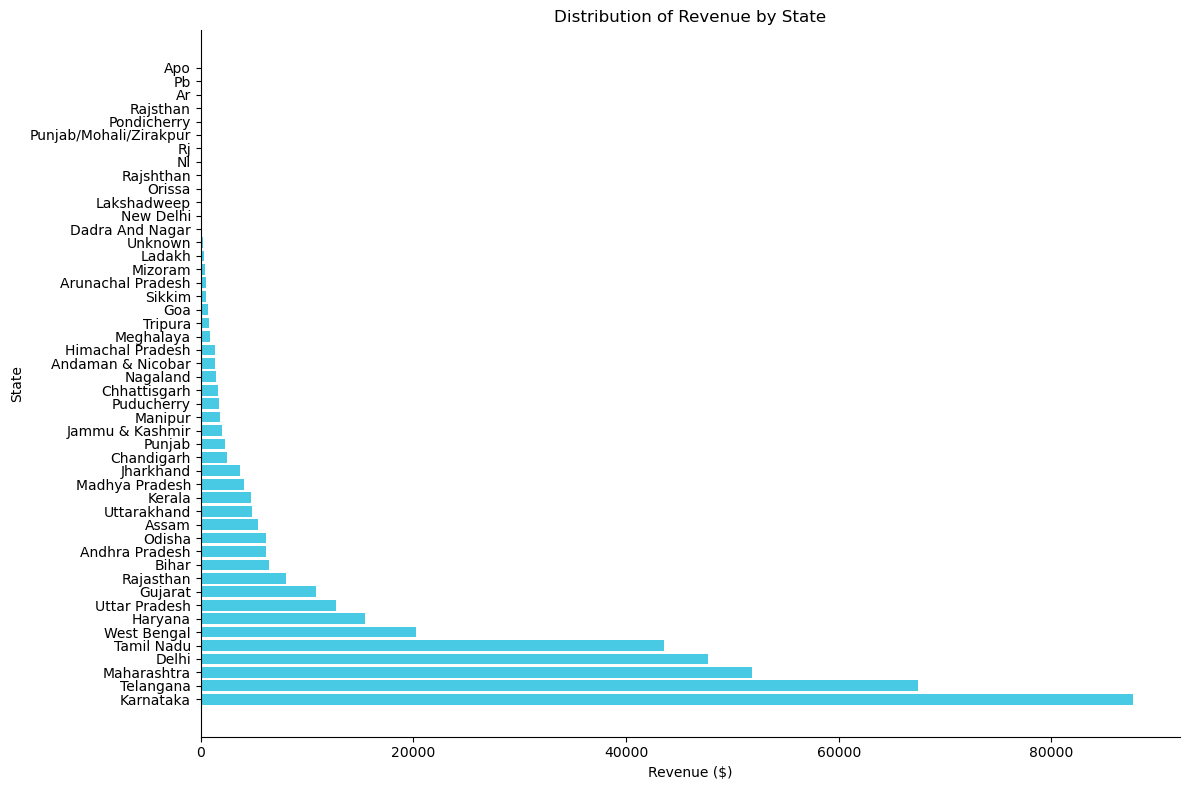

In [ ]:
# Group data by city, state, and customer type to analyze purchasing behavior
customer_demographics = amazon_sales.groupby(['city', 'state']).agg({
    'order_quantity': 'sum',  # Total sales volume
    'order_amount_($)': 'sum'  # Total revenue
}).reset_index()

# Sort by revenue and get top 5 states
customer_demographics = customer_demographics.sort_values('order_amount_($)', ascending=False)

# Create horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(customer_demographics['state'], customer_demographics['order_amount_($)'], color='#48cae4')
plt.title('Distribution of Revenue by State')
plt.xlabel('Revenue ($)')
plt.ylabel('State')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

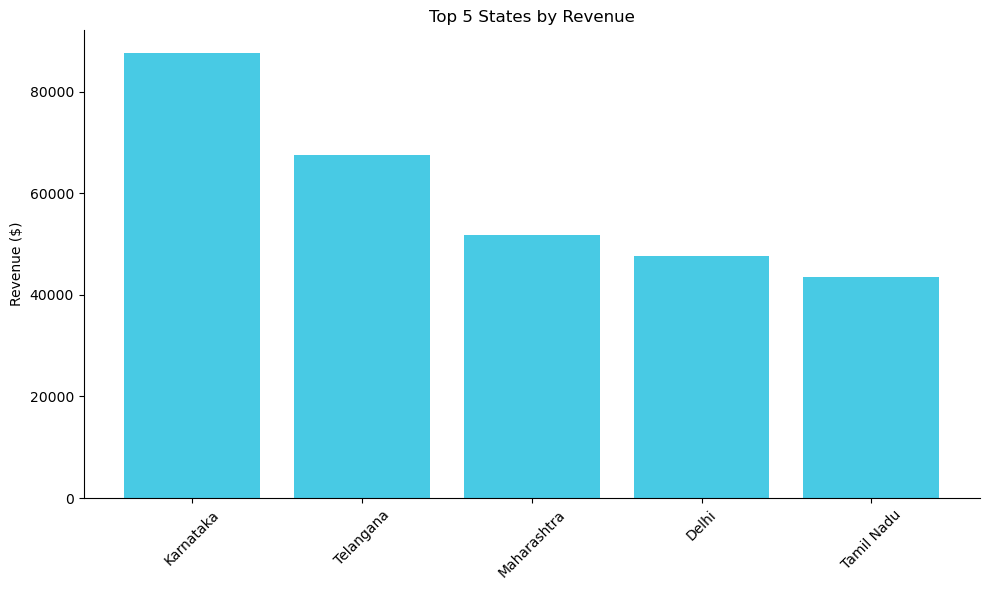

In [ ]:
# Create bar chart for top 5 States
top_5_states = customer_demographics.head()

plt.figure(figsize=(10, 6))
plt.bar(top_5_states['state'], top_5_states['order_amount_($)'], color='#48cae4')
plt.title('Top 5 States by Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
top_5_states

,city,state,order_quantity,order_amount_($)
826,Bengaluru,Karnataka,11023,87709.12
2581,Hyderabad,Telangana,8246,67454.41
4393,Mumbai,Maharashtra,6570,51891.83
4815,New Delhi,Delhi,5745,47735.73
1338,Chennai,Tamil Nadu,5748,43577.06


**Sales Volume Distribution**:
- Karnataka leads in sales volume with over 11,000 orders, primarily driven by Bengaluru, which accounts for the highest number of orders (11,023). This indicates strong demand in the state.

- Telangana follows with 8,246 orders, largely contributed by Hyderabad, which shows significant customer activity.

- Other high-performing states include Maharashtra (6,570 orders), Delhi (5,745 orders), and Tamil Nadu (5,748 orders), reflecting substantial demand in major metropolitan areas like Mumbai, New Delhi, and Chennai.

**Revenue Contribution**:
- Karnataka not only leads in sales volume but also generates the highest revenue at $87,709.12, highlighting its importance as a key market.

- Telangana ranks second in revenue with $67,454.41, indicating strong purchasing power in Hyderabad.
Maharashtra contributes $51,891.83, followed by Delhi ($47,735.73) and Tamil Nadu ($43,577.06). These states maintain a balance between order quantity and revenue.

**Regional Demand Trends**:
- The concentration of sales in urban centers like Bengaluru, Hyderabad, Mumbai, New Delhi, and Chennai underscores the dominance of metropolitan areas in driving sales performance.

- States like Karnataka and Telangana exhibit both high order volumes and revenue, suggesting consistent demand and potential for further growth.

=> **Insights**:
- Key Markets: Karnataka is the most critical market for both sales volume and revenue generation. Efforts should be focused on maintaining its growth trajectory through targeted campaigns. Telangana and Maharashtra also present significant opportunities due to their strong revenue contributions.

- Urban-Centric Demand: The dominance of cities like Bengaluru, Hyderabad, Mumbai, New Delhi, and Chennai highlights the importance of urban-centric strategies to capture demand effectively.

- Revenue Optimization: In states like Tamil Nadu where revenue lags behind order quantity, there is potential to promote premium products or adjust pricing strategies to maximize profitability.


In [ ]:
# Group by customer type and calculate total orders and revenue
customer_segments = amazon_sales.groupby('customer_type').agg({
    'order_ID': 'count',  # Number of orders
    'order_amount_($)': 'sum'  # Total revenue
}).reset_index()

# Display the customer segments
print(customer_segments)

# Identify the customer type with the highest number of orders
loyal_customer_type = customer_segments.loc[customer_segments['order_ID'].idxmax()]
print(f"Loyal Customer Type: {loyal_customer_type['customer_type']} with {loyal_customer_type['order_ID']} orders")

  customer_type  order_ID  order_amount_($)
0      Business       871           7152.82
1      Customer    127926         942427.74
Loyal Customer Type: Customer with 127926 orders


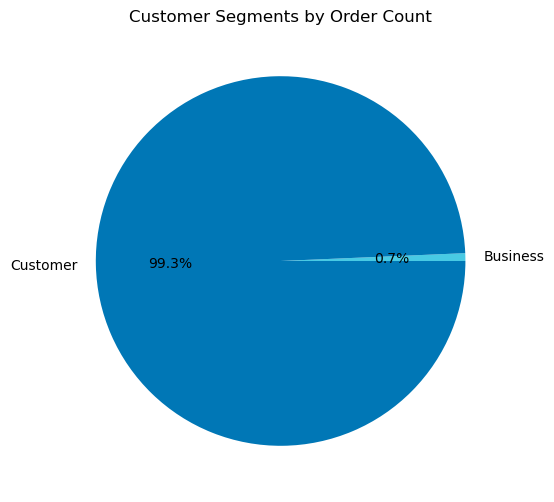

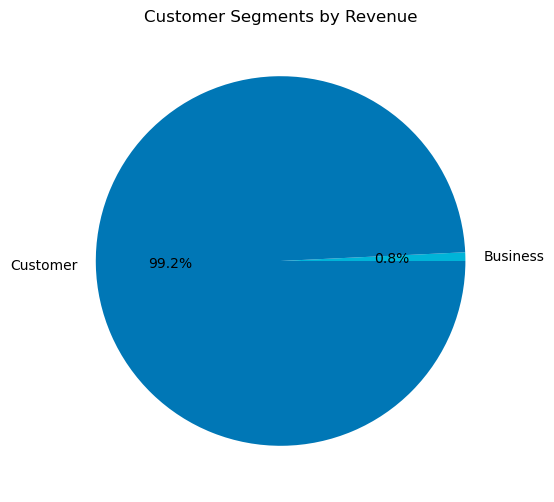

In [ ]:
# Visualize customer segments by order count
plt.figure(figsize=(10, 6))
plt.pie(customer_segments['order_ID'], labels=customer_segments['customer_type'], 
    autopct='%1.1f%%', colors=['#48cae4', '#0077b6'])
plt.title('Customer Segments by Order Count')
plt.show()

# Visualize customer segments by revenue
plt.figure(figsize=(10, 6))
plt.pie(customer_segments['order_amount_($)'], labels=customer_segments['customer_type'], 
    autopct='%1.1f%%', colors=['#00b4d8', '#0077b6'])
plt.title('Customer Segments by Revenue')
plt.show()


#### 2.2 B2B Analysis

In [ ]:
# Group by business and calculate key metrics
int_customer_analysis = combined_international_sales.groupby('customer').agg({
    'quantity': ['count', 'sum'],  # Number of orders and total quantity
    'gross_amount($)': 'sum'  # Total revenue
}).reset_index()

# Flatten column names
int_customer_analysis.columns = ['customer', 'num_orders', 'total_quantity', 'total_revenue']

# Sort by revenue in descending order
int_customer_analysis = int_customer_analysis.sort_values('total_revenue', ascending=False)

# Calculate average order value per customer
int_customer_analysis['avg_order_value'] = int_customer_analysis['total_revenue'] / int_customer_analysis['num_orders']

# Display top 10 customers by revenue
print("Top 10 Businesses by Revenue:")
int_customer_analysis.head(10)

Top 10 Businesses by Revenue:


,customer,num_orders,total_quantity,total_revenue,avg_order_value
81,Mulberries Boutique,3443,3542.0,43079.04,12.512065
8,Amani Concept Trading Llc (Kapda),508,4311.0,16997.85,33.460335
135,Vaharsha Boutique,1347,1823.0,14867.22,11.037283
112,Shilpi Kumari,1713,1749.0,11838.93,6.911226
39,Galaxy Group Of Companies Pvt. Ltd,904,1256.0,10769.76,11.913451
19,Bhanu Saleine Naunitham,921,1403.0,8535.08,9.267188
87,Nirusah Tailoring,726,1138.0,8379.58,11.542121
144,Visha Devan,766,962.0,8376.98,10.936005
33,Ethnic Weaves Fashion Llc,1126,1126.0,7775.74,6.905631
128,Thana Marimuthu,753,882.0,7211.88,9.577530



Total number of unique businesses: 149
Average revenue per business: $2399.35
Average number of orders per business: 225.01


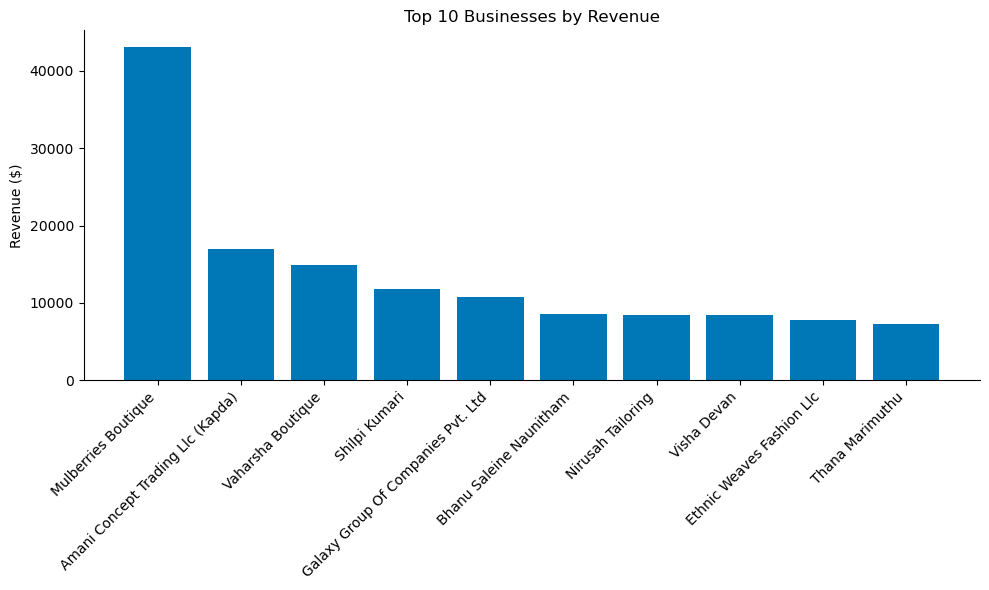

In [ ]:
# Calculate summary statistics
total_customers = len(int_customer_analysis)
avg_revenue_per_customer = int_customer_analysis['total_revenue'].mean()
avg_orders_per_customer = int_customer_analysis['num_orders'].mean()

print(f"\nTotal number of unique businesses: {total_customers}")
print(f"Average revenue per business: ${avg_revenue_per_customer:.2f}")
print(f"Average number of orders per business: {avg_orders_per_customer:.2f}")

# Visualize revenue distribution among top customers
plt.figure(figsize=(10, 6))
plt.bar(int_customer_analysis['customer'].head(10), int_customer_analysis['total_revenue'].head(10), color='#0077b6')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Businesses by Revenue')
plt.ylabel('Revenue ($)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

**Revenue Leaders**:
- Mulberries Boutique: Leads the chart with the highest revenue of $43,079.04, accounting for a significant portion of overall sales. The boutique processed 3,443 orders with a total quantity of 3,542 units and an average order value of $12.51. Despite its dominance in revenue, the average order value is relatively low compared to other businesses, indicating high sales volume but lower-priced items.

- Amani Concept Trading LLC (Kapda): Ranked second with $16,997.85 in revenue, driven by 508 orders and a total quantity of 4,311 units. It has the highest average order value among the top 10 businesses at $33.46, suggesting a focus on premium or higher-priced products.

- Vaharsha Boutique: Third in revenue with $14,867.22, supported by 1,347 orders and a total quantity of 1,823 units. The boutique’s average order value ($11.03) is moderate, reflecting mid-tier pricing.

**Mid-Tier Businesses**:
- Shilpi Kumari generated $11,838.93 from 1,713 orders, with the lowest average order value among mid-tier businesses at $6.91.

- Galaxy Group Of Companies Pvt. Ltd achieved $10,769.76 from 904 orders, maintaining a balanced average order value of $11.91.

- Bhanu Saleine Naunitham recorded revenue of $8,535.08, with an average order value of $9.27, indicating steady performance.

**Lower-Tier Businesses**:
- Businesses like Nirusah Tailoring, Visha Devan, and others contribute lower revenue compared to leaders:

- Nirusah Tailoring generated $8,379.58 from 726 orders, reflecting consistent demand but lower overall contribution.

- Ethnic Weaves Fashion LLC has the lowest average order value among all businesses at just $6.91, despite processing a substantial number of orders (1,126 orders).


### III. Fulfillment Method Profitability Comparison (Shiprocket vs INCREFF)

The cloud_warehouse_adjusted dataframe is used for this analysis

In [ ]:
# Calculate the difference in profitability between INCREFF and Shiprocket
cloud_warehouse_adjusted['profitability_difference($)'] = (
    cloud_warehouse_adjusted['increff_profitability($)'] - cloud_warehouse_adjusted['shiprocket_profitability($)']
)

# Display the table with profitability differences
cloud_warehouse_adjusted

,description,shiprocket_profitability($),increff_profitability($),profitability_difference($)
0,Inbound (Fresh Stock and RTO),0.05,0.05,0.00
1,Outbound,0.08,0.13,0.05
2,Storage Fee/Cft,0.30,0.00,-0.30
3,Customer Return with Detailed QC,0.07,0.19,0.12


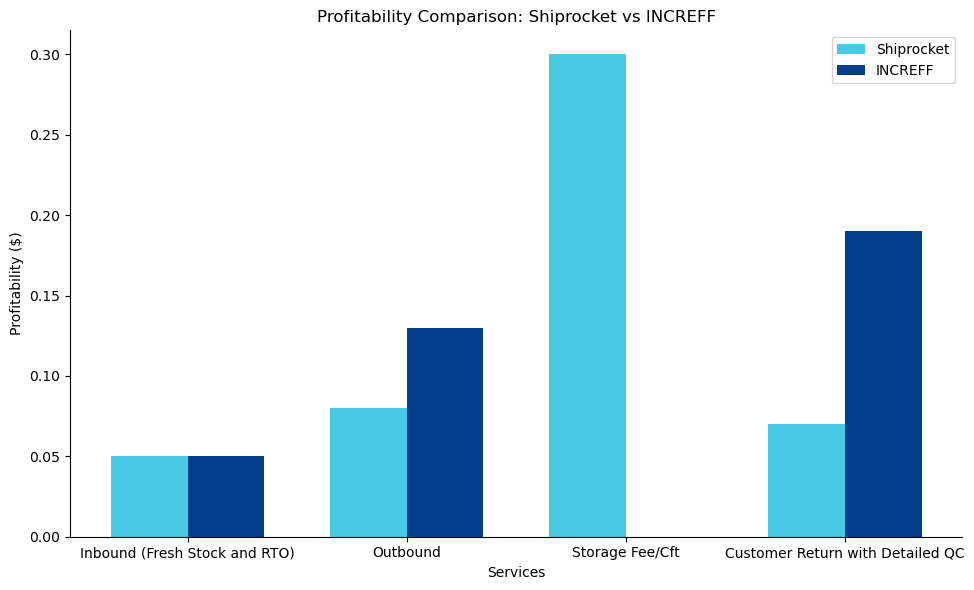

In [ ]:
# Visualize profitability comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(cloud_warehouse_adjusted))

# Bar chart for Shiprocket and INCREFF profitability
plt.bar(index, cloud_warehouse_adjusted['shiprocket_profitability($)'], bar_width, label='Shiprocket', color='#48cae4')
plt.bar([i + bar_width for i in index], cloud_warehouse_adjusted['increff_profitability($)'], bar_width, label='INCREFF', color='#023e8a')
plt.xlabel('Services')
plt.ylabel('Profitability ($)')
plt.title('Profitability Comparison: Shiprocket vs INCREFF')
plt.xticks([i + bar_width / 2 for i in index], cloud_warehouse_adjusted['description'])
plt.legend()
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

- Inbound (Fresh Stock and RTO): Both Shiprocket and INCREFF exhibit identical profitability at $0.05 per unit for inbound logistics. This indicates that neither platform has a competitive advantage in handling fresh stock or return-to-origin (RTO) processes.

- Outbound: INCREFF outperforms Shiprocket with profitability of $0.13 per unit, compared to Shiprocket’s $0.08 per unit. The profitability difference of $0.05 suggests that INCREFF is more efficient or cost-effective in outbound logistics, possibly due to better delivery optimization or lower operational costs.

- Storage Fee/Cft: Shiprocket generates significantly higher profitability at $0.30 per unit, while INCREFF shows no profitability in this category. The profitability difference of -$0.30 highlights Shiprocket’s competitive edge in storage management, making it a preferred choice for businesses requiring warehousing solutions.

- Customer Return with Detailed QC: INCREFF leads in this category with profitability of $0.19 per unit, compared to Shiprocket’s $0.07 per unit. The profitability difference of $0.12 suggests that INCREFF provides more cost-effective or value-added services for handling customer returns with detailed quality checks.

=> **Insights**:
- Competitive Strengths:
    - Shiprocket excels in storage fee management, making it ideal for businesses requiring warehousing solutions.
    - INCREFF demonstrates superior performance in outbound logistics and customer return handling, indicating its strength in delivery optimization and post-sales services.
    
- Neutral Performance: Both platforms perform equally in inbound logistics, suggesting similar operational efficiencies for fresh stock handling and RTO processes.

- Profitability Trade-Offs: Businesses should evaluate their specific needs (e.g., warehousing vs outbound delivery) when choosing between Shiprocket and INCREFF, as each platform has distinct strengths.


### IV. Cross-Platform Pricing Comparison (using may_2022 and march_2021 dataframes)

In [ ]:
# Calculate average prices across platforms
platform_prices_avg = platform_pricing_combined[['ajio_mrp', 'amazon_mrp', 'myntra_mrp', 'flipkart_mrp', 
                                  'limeroad_mrp', 'paytm_mrp', 'snapdeal_mrp']].mean().sort_values(ascending=False)

# Display average prices
print("Average Prices Across Platforms:")
print(platform_prices_avg)

Average Prices Across Platforms:
amazon_mrp      27.197943
flipkart_mrp    27.141431
limeroad_mrp    27.139652
ajio_mrp        27.118971
snapdeal_mrp    27.100348
paytm_mrp       27.085375
myntra_mrp      27.013202
dtype: float64


In [ ]:
# Calculate the platform price variance and standard deviation
price_variance = platform_prices_avg.var()
price_std = platform_prices_avg.std()
avg_price = platform_prices_avg.mean()

# Print the variance and standard deviation
print(f"Price variance: {price_variance:.2f}")
print(f"Price standard deviation: {price_std:.2f}")
print(f"Average price across all platforms: ${avg_price:.2f}")

# Print price differences between highest and lowest platforms
price_diff = platform_prices_avg.max() - platform_prices_avg.min()
highest_platform = platform_prices_avg.idxmax()
lowest_platform = platform_prices_avg.idxmin()

print(f"Price difference between highest ({highest_platform}: ${platform_prices_avg.max():.2f}) and")
print(f"lowest ({lowest_platform}: ${platform_prices_avg.min():.2f}) platforms: ${price_diff:.2f}")
print(f"This represents a {(price_diff / platform_prices_avg.min()) * 100:.2f}% difference")

# Additional descriptive statistics
print("\nDescriptive Statistics for Platform Pricing:")
print(platform_prices_avg.describe())

# Calculate coefficient of variation (CV)
cv = (price_std / avg_price) * 100
print(f"\nCoefficient of Variation: {cv:.2f}%")

Price variance: 0.00
Price standard deviation: 0.06
Average price across all platforms: $27.11
Price difference between highest (amazon_mrp: $27.20) and
lowest (myntra_mrp: $27.01) platforms: $0.18
This represents a 0.68% difference

Descriptive Statistics for Platform Pricing:
count     7.000000
mean     27.113846
std       0.057224
min      27.013202
25%      27.092862
50%      27.118971
75%      27.140541
max      27.197943
dtype: float64

Coefficient of Variation: 0.21%


In [ ]:
# Calculate profit margins for each platform using tp1
platform_pricing_combined['ajio_margin'] = platform_pricing_combined['ajio_mrp'] - platform_pricing_combined['tp_1']
platform_pricing_combined['amazon_margin'] = platform_pricing_combined['amazon_mrp'] - platform_pricing_combined['tp_1']
platform_pricing_combined['myntra_margin'] = platform_pricing_combined['myntra_mrp'] - platform_pricing_combined['tp_1']
platform_pricing_combined['flipkart_margin'] = platform_pricing_combined['flipkart_mrp'] - platform_pricing_combined['tp_1']
platform_pricing_combined['limeroad_margin'] = platform_pricing_combined['limeroad_mrp'] - platform_pricing_combined['tp_1']
platform_pricing_combined['paytm_margin'] = platform_pricing_combined['paytm_mrp'] - platform_pricing_combined['tp_1']
platform_pricing_combined['snapdeal_margin'] = platform_pricing_combined['snapdeal_mrp'] - platform_pricing_combined['tp_1']

# Calculate average profit margins across platforms
platform_margins = platform_pricing_combined[['ajio_margin', 'amazon_margin', 'myntra_margin', 
                                  'flipkart_margin', 'limeroad_margin', 
                                  'paytm_margin', 'snapdeal_margin']].mean().sort_values(ascending=False)

# Display average profit margins
print("\nAverage Profit Margins Across Platforms:")
print(platform_margins)


Average Profit Margins Across Platforms:
amazon_margin      20.267370
flipkart_margin    20.210858
limeroad_margin    20.209080
ajio_margin        20.188399
snapdeal_margin    20.169776
paytm_margin       20.154803
myntra_margin      20.045429
dtype: float64


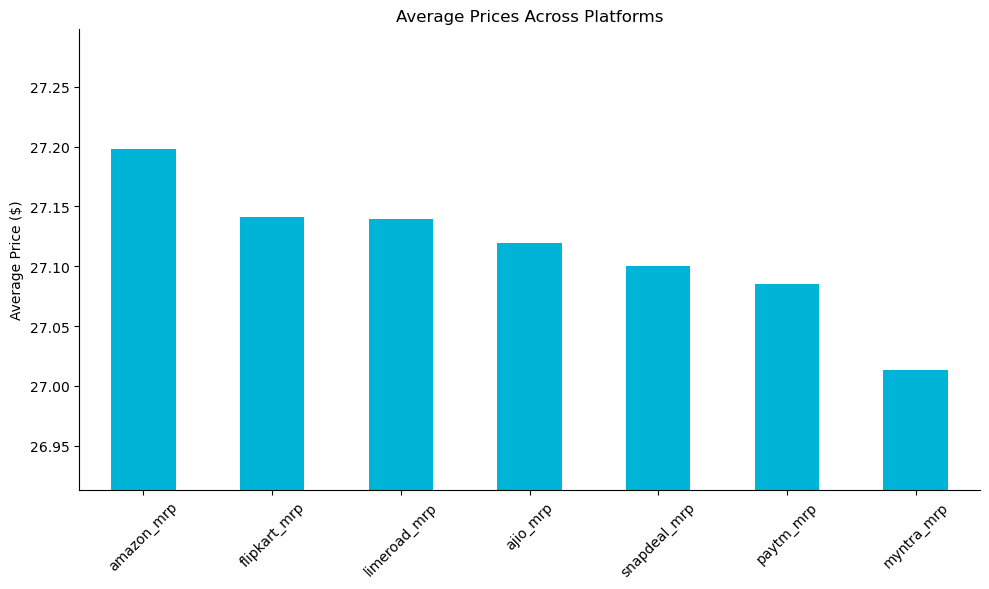

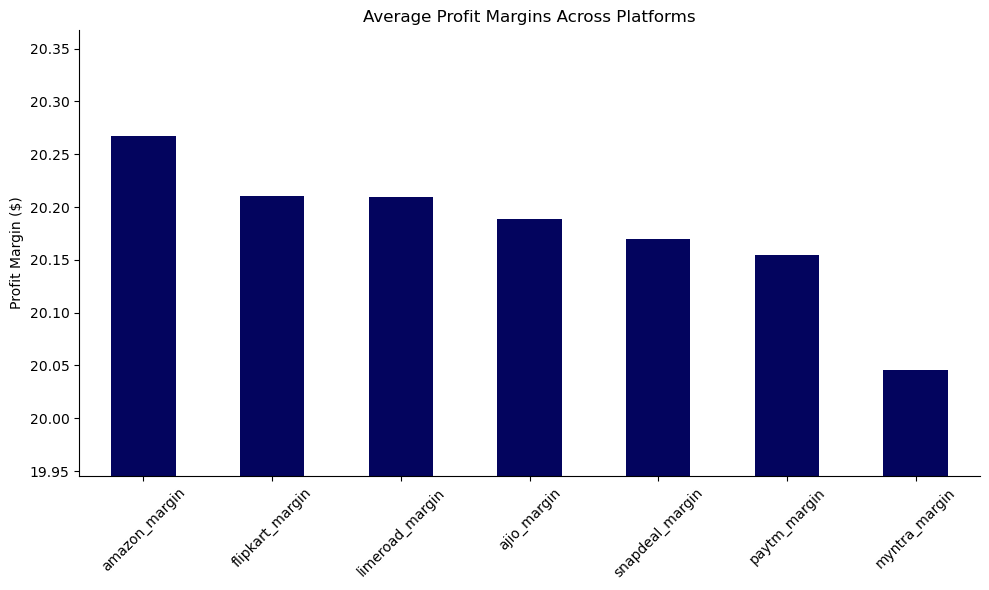

In [ ]:
# Visualize price comparison across platforms
plt.figure(figsize=(10, 6))
platform_prices_avg.plot(kind='bar', color='#00b4d8')
plt.title('Average Prices Across Platforms')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.ylim(platform_prices_avg.min() - 0.1, platform_prices_avg.max() + 0.1)  # Adjust y-axis limits to zoom in
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# Visualize profit margins across platforms
plt.figure(figsize=(10, 6))
platform_margins.plot(kind='bar', color='#03045e')
plt.title('Average Profit Margins Across Platforms')
plt.ylabel('Profit Margin ($)')
plt.xticks(rotation=45)
plt.ylim(platform_margins.min() - 0.1, platform_margins.max() + 0.1)  # Adjust y-axis limits to zoom in
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

**Average Prices Across Platforms**:
- Amazon: Amazon has the highest average price at $27.20, indicating its positioning as a premium platform for clothing. This suggests that Amazon may cater to customers willing to pay slightly higher prices for perceived quality or convenience.

- Flipkart and Limeroad: Flipkart ($27.14) and Limeroad ($27.13) closely follow Amazon, reflecting competitive pricing strategies to attract customers while maintaining profitability.

- Ajio and Snapdeal: Ajio ($27.12) and Snapdeal ($27.10) maintain mid-tier pricing, appealing to value-conscious customers without significant price differentiation.

- Paytm: Paytm ($27.08) offers slightly lower prices compared to other platforms, likely targeting budget-conscious customers or leveraging promotional discounts.

- Myntra: Myntra has the lowest average price at $27.01, suggesting a focus on affordability or frequent discounts to attract customers in competitive segments.

**Average Profit Margins Across Platforms**:
- Amazon: Amazon leads in profit margins at $20.27, highlighting its ability to maintain high profitability despite its premium pricing strategy.

- Flipkart and Limeroad: Flipkart ($20.21) and Limeroad ($20.21) show comparable profit margins, reflecting efficient cost management while remaining competitive in pricing.

- Ajio and Snapdeal: Ajio ($20.19) and Snapdeal ($20.17) maintain slightly lower profit margins compared to Amazon, indicating their focus on balancing affordability with profitability.

- Paytm: Paytm ($20.15) has marginally lower profit margins, likely due to its aggressive pricing strategy aimed at capturing budget-conscious customers.

- Myntra: Myntra has the lowest profit margin at $20.05, which aligns with its lower average price point, suggesting a trade-off between affordability and profitability.

=> **Insights**: 
- Premium Positioning of Amazon: Amazon’s leadership in both average price and profit margin highlights its strong brand positioning as a premium platform, making it ideal for targeting high-value customers.

- Competitive Pricing Strategies: Platforms like Flipkart, Limeroad, Ajio, and Snapdeal demonstrate balanced pricing strategies that appeal to mid-tier customers while maintaining healthy profit margins.

- Budget-Conscious Platforms: Paytm and Myntra cater to price-sensitive segments but face challenges in maintaining high profit margins due to their lower average prices.

- Profitability Trade-Offs: Myntra’s combination of the lowest average price and profit margin suggests a deliberate focus on affordability over profitability, which may require careful monitoring to ensure long-term sustainability.


### V. Cost and Expenses Analysis

The expense dataframe is used for this analysis

In [ ]:
# Summarize total expenses
total_expenses = expense['expense_amount($)'].sum()
print(f"Total Expenses: ${total_expenses:.2f}")

# Group by expense category and calculate total amount spent per category
category_expenses = expense.groupby('expenses')['expense_amount($)'].sum().reset_index()
category_expenses = category_expenses.sort_values(by='expense_amount($)', ascending=False)

# Display expense breakdown by category
print("\nExpense Breakdown by Category:")
print(category_expenses)

Total Expenses: $218.93

Expense Breakdown by Category:
                                             expenses  expense_amount($)
2                                       Bhushan Hotel              30.32
7                                                Food              15.61
9                                                 OLA              10.15
1                                        Bhushan Cash               9.68
0                                           Auto Rent               6.29
12                                            TT Fine               6.05
3                                            Choclate               4.84
8                                           Large Bag               4.60
4                                               Cooli               3.63
6                              Expomart Labour Charge               2.42
11  Stationary(Soft Pin, Paper pin for Dupatta, Fe...               2.06
5                               Delhi Hotel Rest Room               

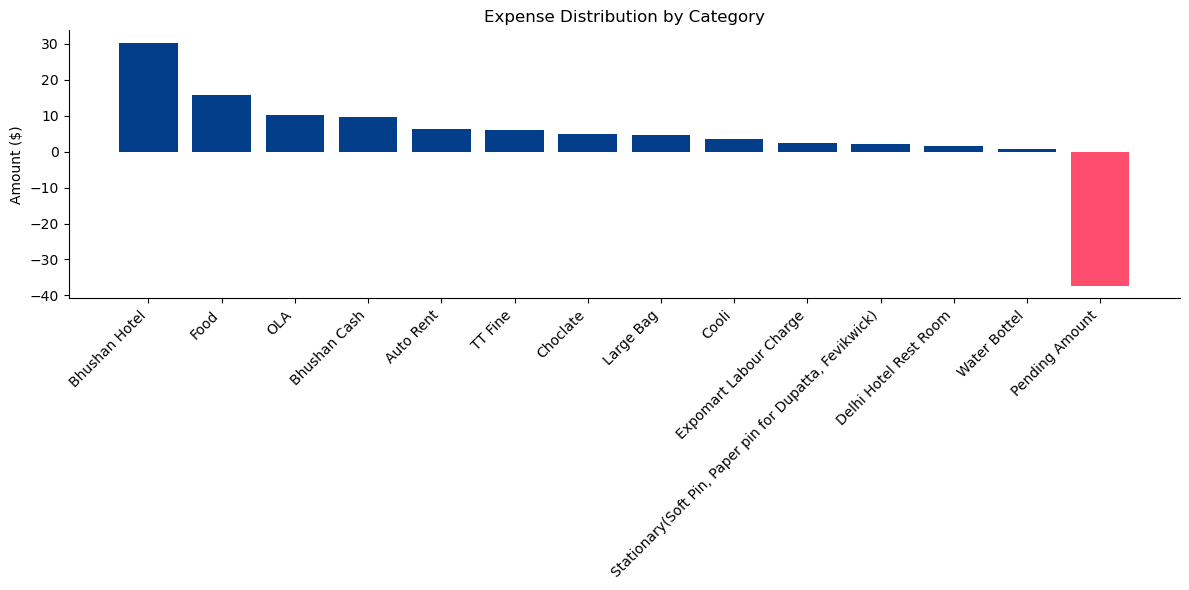

In [ ]:
# Plot expense distribution by category (Bar Chart)
colors = ['#ff4d6d' if val < 0 else '#023e8a' for val in category_expenses['expense_amount($)']]  #Define colors: red negative, blue positive
plt.figure(figsize=(12, 6))
plt.bar(category_expenses['expenses'], category_expenses['expense_amount($)'], color=colors)
plt.title('Expense Distribution by Category')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

- Bhushan Hotel: Represents the largest expense category, contributing approximately $30 to total expenses. This indicates significant spending on accommodation, likely tied to operational or travel requirements.

- Food: Accounts for the second-largest expense (~$20), reflecting consistent spending on meals during business operations.

- OLA: Transportation costs via OLA contribute approximately $10, highlighting regular travel needs.
- Bhushan Cash and Auto Rent: Both categories contribute ~$10, suggesting balanced spending on miscellaneous cash needs and local transportation.

- TT Fine, Chocolate, and Large Bag: Each accounts for smaller expenses (~$5), reflecting occasional or one-off purchases.

- Minor Expense Categories Categories like Cooli, Expomart Labour Charge, and Stationery (Soft Pin, Paper Pin for Dupatta, Fevikwik) represent minimal expenses (<$5), indicating specialized or infrequent spending.

- Pending Amount: The pending amount is highlighted as a negative expense (~-$40), indicating unresolved financial obligations or refunds that impact overall expense reporting.


### VI. Inventory Analysis

The sale_report dataframe is used for this analysis

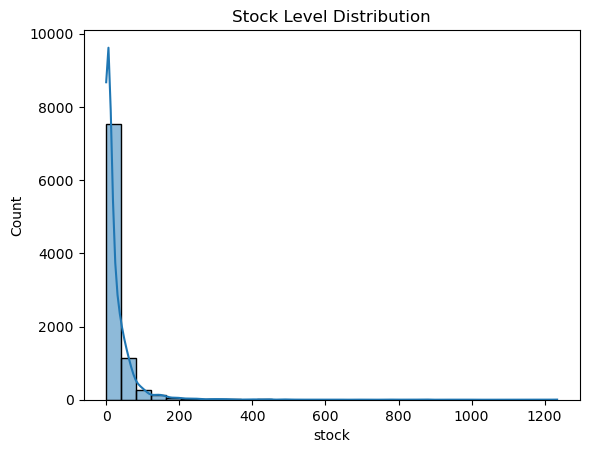

In [ ]:
# Histogram for stock levels
sns.histplot(sale_report['stock'], bins=30, kde=True)
plt.title('Stock Level Distribution')
plt.show()

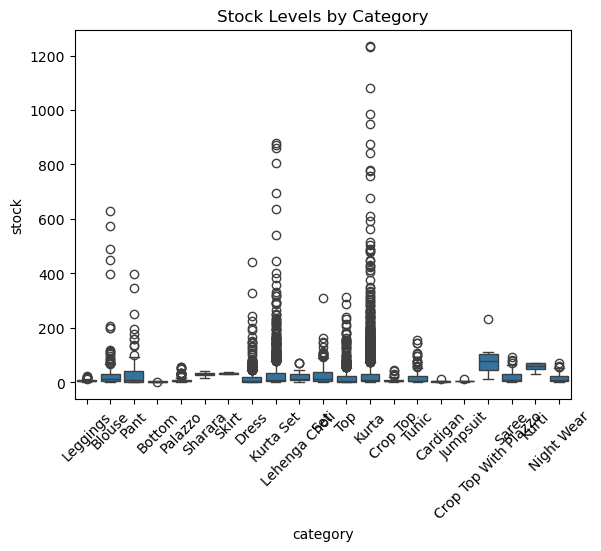

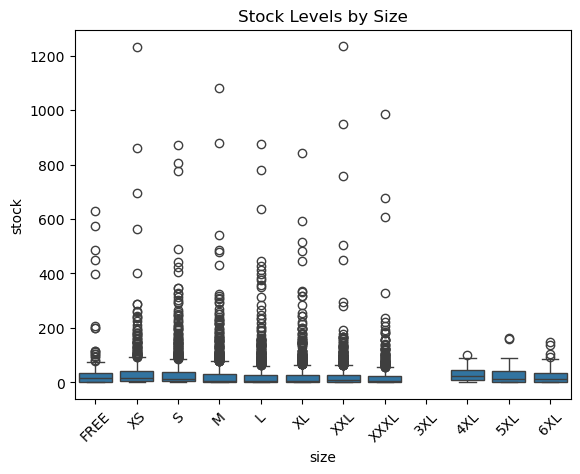

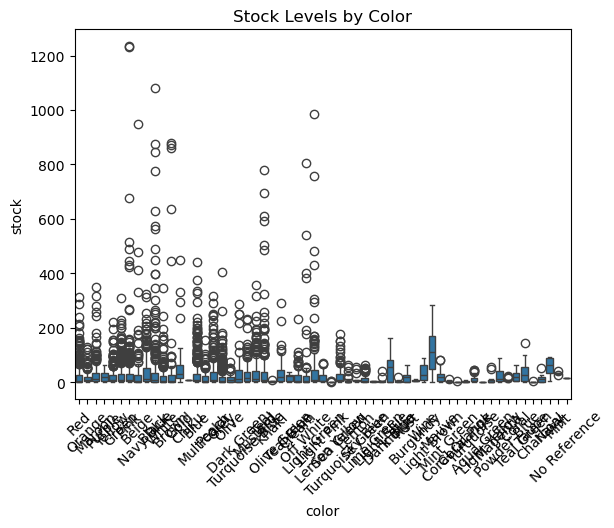

In [ ]:
# Boxplot for stock levels by category
sns.boxplot(x='category', y='stock', data=sale_report)
plt.title('Stock Levels by Category')
plt.xticks(rotation=45)
plt.show()

# Boxplot for stock levels by size
sns.boxplot(x='size', y='stock', data=sale_report)
plt.title('Stock Levels by Size')
plt.xticks(rotation=45)
plt.show()

# Boxplot for stock levels by color
sns.boxplot(x='color', y='stock', data=sale_report)
plt.title('Stock Levels by Color')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Detect outliers using IQR for stock levels
Q1 = sale_report['stock'].quantile(0.25)
Q3 = sale_report['stock'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sale_report[(sale_report['stock'] < lower_bound) | (sale_report['stock'] > upper_bound)]
print(f"Number of outliers in stock levels: {len(outliers)}")


Number of outliers in stock levels: 684


#### Stock level by Category

In [ ]:
# Analyze total stock levels by category
total_stock_by_category = sale_report.groupby('category')['stock'].sum().reset_index().sort_values(by='stock', ascending=False)
print("Total Stock by Category:")
print(total_stock_by_category)

Total Stock by Category:
                category     stock
7                  Kurta  114339.0
8              Kurta Set   47684.0
16                   Set   24643.0
19                   Top   16609.0
5                  Dress   11675.0
0                 Blouse    7932.0
14                  Pant    3436.0
12            Night Wear    3288.0
20                 Tunic    2967.0
15                 Saree    2777.0
9                  Kurti    1605.0
17               Sharara    1190.0
13               Palazzo     963.0
11         Lehenga Choli     736.0
10              Leggings     715.0
18                 Skirt     673.0
4   Crop Top With Plazzo     617.0
3               Crop Top     405.0
2               Cardigan      58.0
1                 Bottom      41.0
6               Jumpsuit      33.0


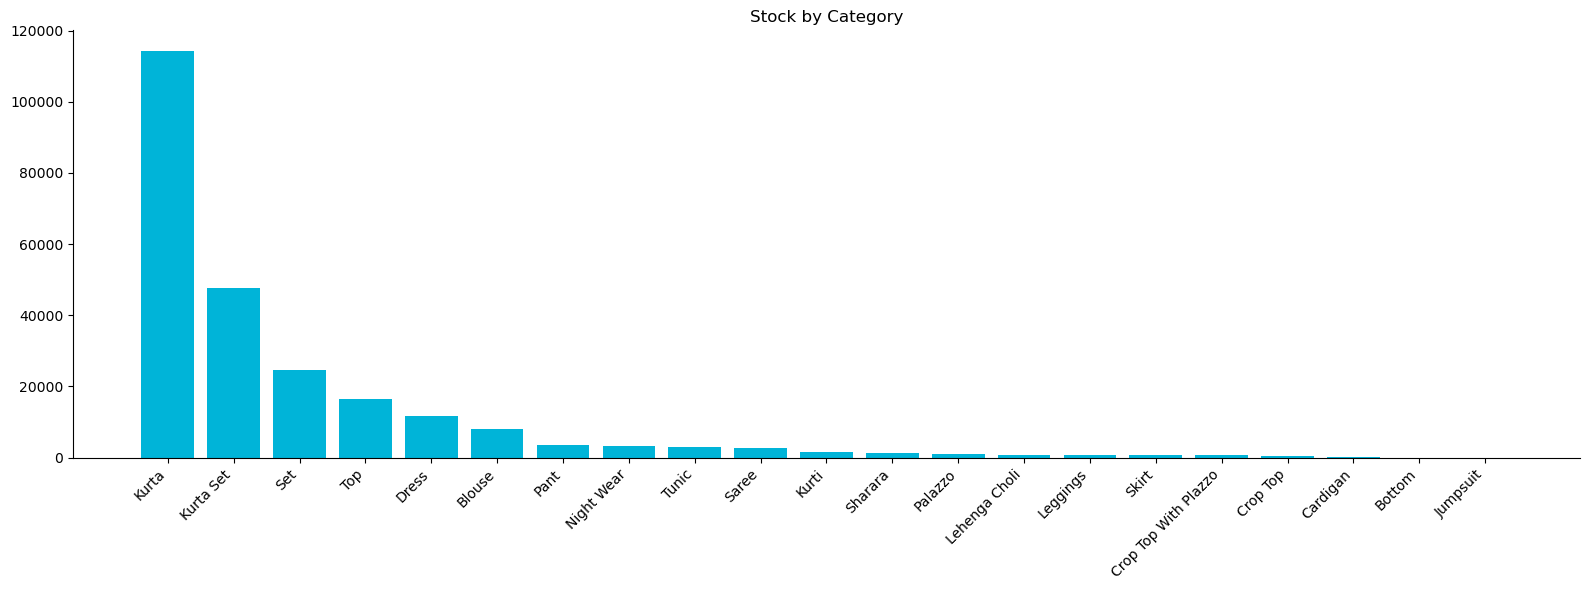

In [ ]:
# Visualize stock distribution by category
plt.figure(figsize=(16, 6))
plt.bar(total_stock_by_category['category'], total_stock_by_category['stock'], color='#00b4d8')
plt.title('Stock by Category')
plt.xticks(rotation=45, ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

#### Stock Level by Size

In [ ]:
# Analyze stock distribution by size
stock_by_size = sale_report.groupby('size')['stock'].sum().reset_index()
sorted_stock_by_size = stock_by_size.sort_values(by='stock', ascending=False)
print("\nStock Distribution by Size:")
print(stock_by_size)


Stock Distribution by Size:
    size    stock
0   FREE   7841.0
1     XS  35082.0
2      S  41872.0
3      M  37163.0
4      L  32953.0
5     XL  32046.0
6    XXL  30683.0
7   XXXL  21596.0
8    3XL      0.0
9    4XL    978.0
10   5XL   1061.0
11   6XL   1111.0


C:\Users\chauc\AppData\Local\Temp\ipykernel_2712\2878940694.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stock_by_size = sale_report.groupby('size')['stock'].sum().reset_index()


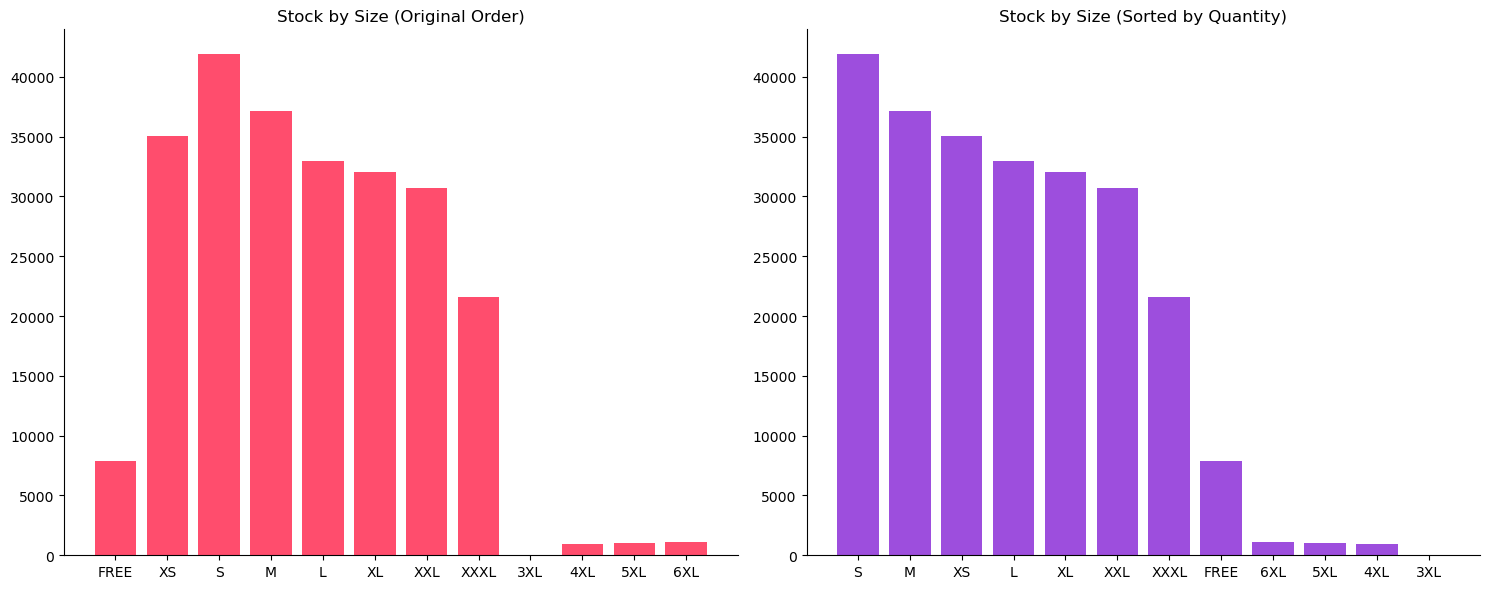

In [ ]:
# Visualize stock distribution by size
plt.figure(figsize=(15, 6))

# Subplot 1: Regular stock by size
plt.subplot(1, 2, 1)
plt.bar(stock_by_size['size'], stock_by_size['stock'], color='#ff4d6d')
plt.title('Stock by Size (Original Order)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Subplot 2: Sorted stock by size
plt.subplot(1, 2, 2)
plt.bar(sorted_stock_by_size['size'], sorted_stock_by_size['stock'], color='#9d4edd')
plt.title('Stock by Size (Sorted by Quantity)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#### Stock Level by Color

In [ ]:
# Analyze stock distribution by color
stock_by_color = sale_report.groupby('color')['stock'].sum().reset_index().sort_values('stock', ascending=False)
top_5_stock_by_color = stock_by_color.sort_values('stock', ascending=False).head() 
print("\nStock Distribution by Color:")
print(stock_by_color)


Stock Distribution by Color:
              color    stock
2             Black  22194.0
42             Pink  21456.0
3              Blue  19300.0
15            Green  14863.0
50             Teal  14261.0
28           Maroon  12187.0
35        Navy Blue  12183.0
33          Mustard  12049.0
23      Light Green  10876.0
41            Peach  10637.0
45              Red   8532.0
16             Grey   7749.0
56            White   7477.0
58           Yellow   6914.0
4             Brown   6681.0
1             Beige   6130.0
37        Off White   5028.0
11            Cream   3794.0
54   Turquoise Blue   3322.0
47        Sea Green   3253.0
57             Wine   3088.0
32       Multicolor   3032.0
40           Orange   2987.0
14             Gold   2638.0
12        Dark Blue   2535.0
13       Dark Green   2202.0
39      Olive Green   2014.0
27          Magenta   1696.0
52       Teal Green   1683.0
22      Light Brown   1679.0
44           Purple   1176.0
48         Sky Blue   1118.0
46           

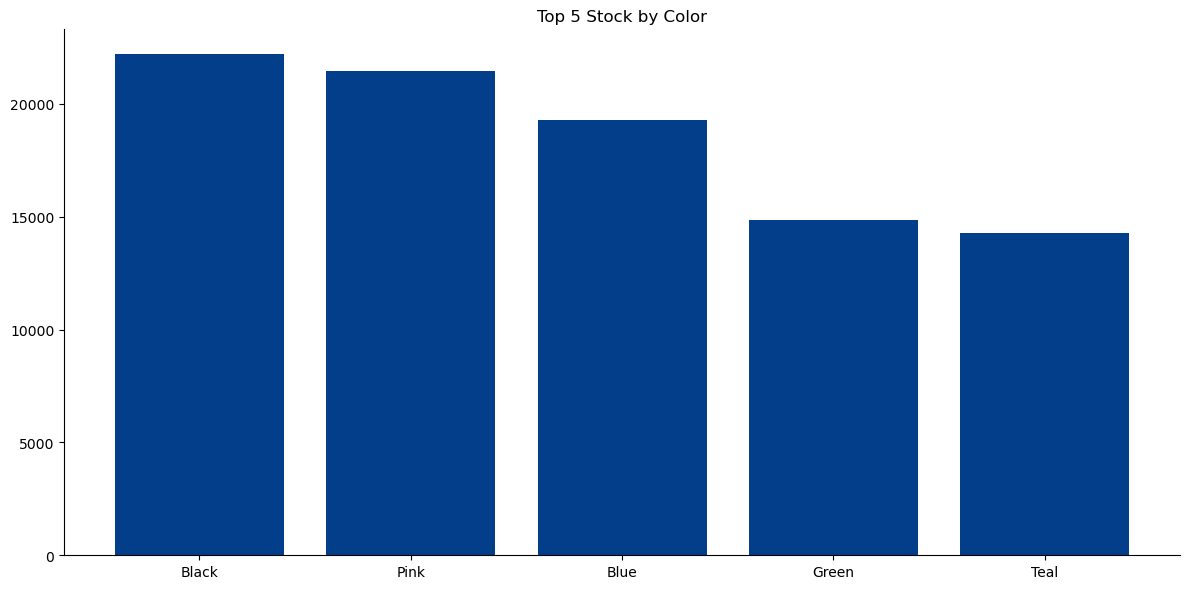

In [ ]:
# Visualize stock distribution by color
plt.figure(figsize=(12, 6))
plt.bar(top_5_stock_by_color['color'], top_5_stock_by_color['stock'], color='#023e8a')
plt.title('Top 5 Stock by Color')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

**Stock Levels by Categories**:
- Kurta: Dominates stock levels with over 120,000 units, indicating its popularity and significant contribution to inventory.

- Kurta Set: The second-largest category with approximately 50,000 units, reflecting strong customer demand for coordinated outfits.

- Set: Holds around 30,000 units, highlighting its importance as a mid-tier category.

- Top and Dress: Both categories have moderate stock levels, ranging between 20,000–25,000 units, suggesting steady demand.

- Categories like "Sharara," "Palazzo," "Saree," and "Crop Top" have minimal stock levels, indicating niche demand or limited availability.

**Stock Levels by Sizes**: 
- Popular Sizes: Sizes "Small (S)," "Medium (M)," and "Large (L)" have the highest stock levels, each exceeding 35,000 units, reflecting strong customer preference for standard sizes.

- Extra Large Sizes (XL to XXL): These sizes maintain steady stock levels (~30,000 units), catering to larger size preferences.

- Niche Sizes: Sizes like "3XL," "4XL," "5XL," and "6XL" have minimal stock levels (<5,000 units), indicating limited demand or specialized use cases.

**Stock Levels by Colors**:
- Top Colors: Black leads as the most stocked color (~22,000 units), followed closely by Pink (~21,500 units) and Blue (~21,000 units).

- Other Popular Colors: Green (~19,500 units) and Teal (~19,000 units) round out the top five colors, reflecting balanced customer preferences across vibrant and neutral tones.
